In [ ]:
### Code contains analysis for generating pathway scoring of identified temporal clusters of upregulated DGEs in old vs young mice at day 37 shown in Figure 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import ma_codes as codes
from ma_codes import mysize, gray_red, mymap
import pertpy as pt
%matplotlib inline
import math

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

import warnings
warnings.filterwarnings("ignore")

Running Scanpy 1.10.2, on 2024-09-18 16:34.


In [7]:
print(sb.__version__)

0.13.2


In [8]:
plot_folder = "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/"

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42

In [9]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "230111_Bleo_Ageing_annotated_final.h5ad")

In [10]:
def Convert(string):
    li = list(string.split(","))
    return li

In [11]:
import rpy2
%load_ext rpy2.ipython

In [14]:
%%R
library(ggplot2)
library(gdata)
library(tidyr)
library(pheatmap)
library(tibble)
library(msigdbr)
library(dplyr)

In [7]:
%%R
all_gene_sets = msigdbr(species = "Mus musculus")

In [15]:
%%R
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_CH.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_CH.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_CH.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_CH.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Zurich
tzcode source: system (glibc)

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] dplyr_1.1.4     msigdbr_7.5.1   tibble_3.2.1    pheatmap_1.0.12
[5] tidyr_1.3.1     gdata_3.0.0     ggplot2_3.5.1  

loaded via a namespace (and not attached):
 [1] vctrs_0.6.5        cli_3.6.3       

In [8]:
%%R
hallmark_gene_sets = msigdbr(species = "mouse", category = "H")
#head(hallmark_gene_sets)

In [24]:
%%R
hallmark_table <- hallmark_gene_sets %>% dplyr::distinct(gs_name, gene_symbol) %>% as.data.frame()
#head(hallmark_table)

In [7]:
%%R
write.csv(hallmark_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/msigdb_mouse_hallmark_gene_sets.csv",
                     row.names = FALSE)

In [9]:
hallmark_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/msigdb_mouse_hallmark_gene_sets.csv")
#hallmark_table.head()

In [10]:
output_path = "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/"

In [13]:
import os
os.chdir("//home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/")

computing score 'HALLMARK_INTERFERON_GAMMA_RESPONSE'
    finished: added
    'HALLMARK_INTERFERON_GAMMA_RESPONSE', score of gene set (adata.obs).
    792 total control genes are used. (0:00:00)
computing score 'HALLMARK_INTERFERON_ALPHA_RESPONSE'
    finished: added
    'HALLMARK_INTERFERON_ALPHA_RESPONSE', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
computing score 'HALLMARK_MTORC1_SIGNALING'
    finished: added
    'HALLMARK_MTORC1_SIGNALING', score of gene set (adata.obs).
    594 total control genes are used. (0:00:00)
computing score 'HALLMARK_INFLAMMATORY_RESPONSE'
    finished: added
    'HALLMARK_INFLAMMATORY_RESPONSE', score of gene set (adata.obs).
    941 total control genes are used. (0:00:00)


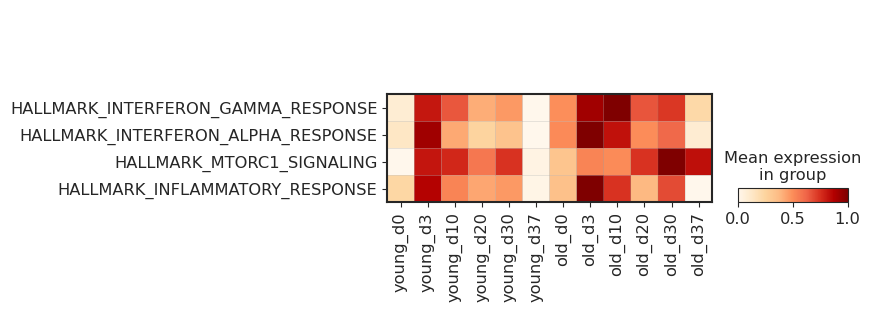

In [14]:
# Cluster 1
# MSigDB
HALLMARK_INTERFERON_GAMMA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_GAMMA_RESPONSE"]
HALLMARK_INTERFERON_GAMMA_RESPONSE = HALLMARK_INTERFERON_GAMMA_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_GAMMA_RESPONSE, score_name = "HALLMARK_INTERFERON_GAMMA_RESPONSE")

HALLMARK_INTERFERON_ALPHA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_ALPHA_RESPONSE"]
HALLMARK_INTERFERON_ALPHA_RESPONSE = HALLMARK_INTERFERON_ALPHA_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_ALPHA_RESPONSE, score_name = "HALLMARK_INTERFERON_ALPHA_RESPONSE")

HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

HALLMARK_INFLAMMATORY_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INFLAMMATORY_RESPONSE"]
HALLMARK_INFLAMMATORY_RESPONSE = HALLMARK_INFLAMMATORY_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INFLAMMATORY_RESPONSE, score_name = "HALLMARK_INFLAMMATORY_RESPONSE")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_INTERFERON_GAMMA_RESPONSE", "HALLMARK_INTERFERON_ALPHA_RESPONSE", "HALLMARK_MTORC1_SIGNALING", "HALLMARK_INFLAMMATORY_RESPONSE"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd", 
                 #save = "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_1_msigdb.pdf",
                save = "cluster_1_msigdb.pdf"

                )

computing score 'HALLMARK_APOPTOSIS'
    finished: added
    'HALLMARK_APOPTOSIS', score of gene set (adata.obs).
    842 total control genes are used. (0:00:05)


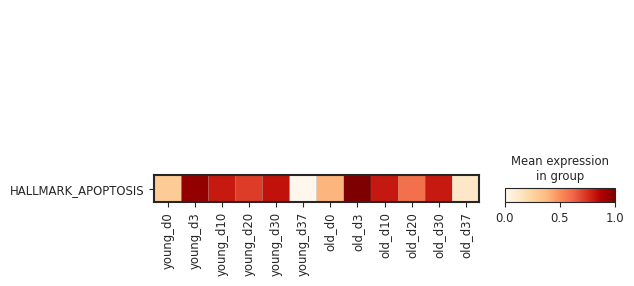

In [10]:
# Cluster 2
# MSigDB
HALLMARK_APOPTOSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APOPTOSIS"]
HALLMARK_APOPTOSIS = HALLMARK_APOPTOSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_APOPTOSIS, score_name = "HALLMARK_APOPTOSIS")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_APOPTOSIS"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_G2M_CHECKPOINT'
    finished: added
    'HALLMARK_G2M_CHECKPOINT', score of gene set (adata.obs).
    644 total control genes are used. (0:00:04)
computing score 'HALLMARK_E2F_TARGETS'
    finished: added
    'HALLMARK_E2F_TARGETS', score of gene set (adata.obs).
    643 total control genes are used. (0:00:04)
computing score 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE'
    finished: added
    'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', score of gene set (adata.obs).
    654 total control genes are used. (0:00:04)
computing score 'HALLMARK_DNA_REPAIR'
    finished: added
    'HALLMARK_DNA_REPAIR', score of gene set (adata.obs).
    744 total control genes are used. (0:00:04)


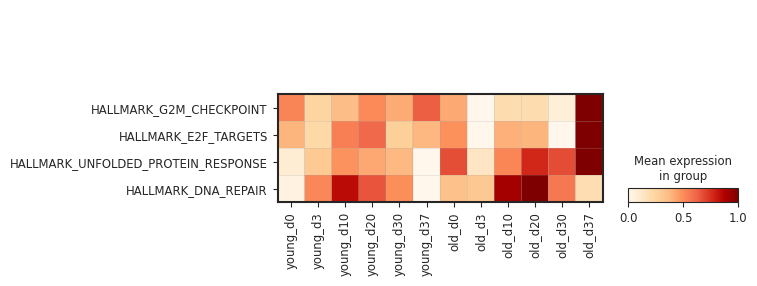

In [14]:
# Cluster 3
# MSigDb
HALLMARK_G2M_CHECKPOINT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_G2M_CHECKPOINT"]
HALLMARK_G2M_CHECKPOINT = HALLMARK_G2M_CHECKPOINT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_G2M_CHECKPOINT, score_name = "HALLMARK_G2M_CHECKPOINT")

HALLMARK_E2F_TARGETS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_E2F_TARGETS"]
HALLMARK_E2F_TARGETS = HALLMARK_E2F_TARGETS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_E2F_TARGETS, score_name = "HALLMARK_E2F_TARGETS")

HALLMARK_UNFOLDED_PROTEIN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"]
HALLMARK_UNFOLDED_PROTEIN_RESPONSE = HALLMARK_UNFOLDED_PROTEIN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_UNFOLDED_PROTEIN_RESPONSE, score_name = "HALLMARK_UNFOLDED_PROTEIN_RESPONSE")

HALLMARK_DNA_REPAIR = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_DNA_REPAIR"]
HALLMARK_DNA_REPAIR = HALLMARK_DNA_REPAIR["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_DNA_REPAIR, score_name = "HALLMARK_DNA_REPAIR")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_G2M_CHECKPOINT", "HALLMARK_E2F_TARGETS", "HALLMARK_UNFOLDED_PROTEIN_RESPONSE", "HALLMARK_DNA_REPAIR"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_MTORC1_SIGNALING'
    finished: added
    'HALLMARK_MTORC1_SIGNALING', score of gene set (adata.obs).
    594 total control genes are used. (0:00:05)
computing score 'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
    finished: added
    'HALLMARK_OXIDATIVE_PHOSPHORYLATION', score of gene set (adata.obs).
    591 total control genes are used. (0:00:04)
computing score 'HALLMARK_GLYCOLYSIS'
    finished: added
    'HALLMARK_GLYCOLYSIS', score of gene set (adata.obs).
    1092 total control genes are used. (0:00:05)
computing score 'HALLMARK_P53_PATHWAY'
    finished: added
    'HALLMARK_P53_PATHWAY', score of gene set (adata.obs).
    840 total control genes are used. (0:00:04)


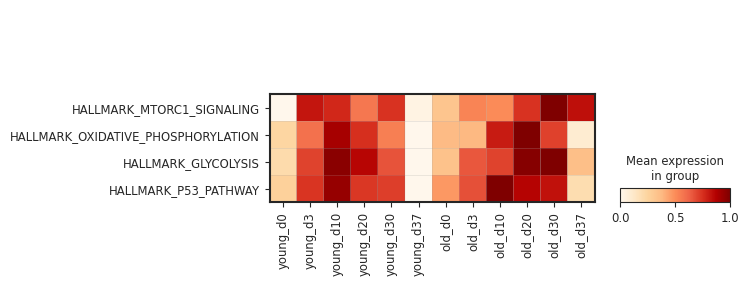

In [15]:
# Cluster 4
# MSigDB
HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_GLYCOLYSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_GLYCOLYSIS"]
HALLMARK_GLYCOLYSIS = HALLMARK_GLYCOLYSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_GLYCOLYSIS, score_name = "HALLMARK_GLYCOLYSIS")

HALLMARK_P53_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_P53_PATHWAY"]
HALLMARK_P53_PATHWAY = HALLMARK_P53_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_P53_PATHWAY, score_name = "HALLMARK_P53_PATHWAY")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_MTORC1_SIGNALING", "HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_GLYCOLYSIS", "HALLMARK_P53_PATHWAY"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_G2M_CHECKPOINT'
    finished: added
    'HALLMARK_G2M_CHECKPOINT', score of gene set (adata.obs).
    644 total control genes are used. (0:00:04)
computing score 'HALLMARK_MITOTIC_SPINDLE'
    finished: added
    'HALLMARK_MITOTIC_SPINDLE', score of gene set (adata.obs).
    741 total control genes are used. (0:00:04)
computing score 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE'
    finished: added
    'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', score of gene set (adata.obs).
    654 total control genes are used. (0:00:04)
computing score 'HALLMARK_PROTEIN_SECRETION'
    finished: added
    'HALLMARK_PROTEIN_SECRETION', score of gene set (adata.obs).
    597 total control genes are used. (0:00:04)


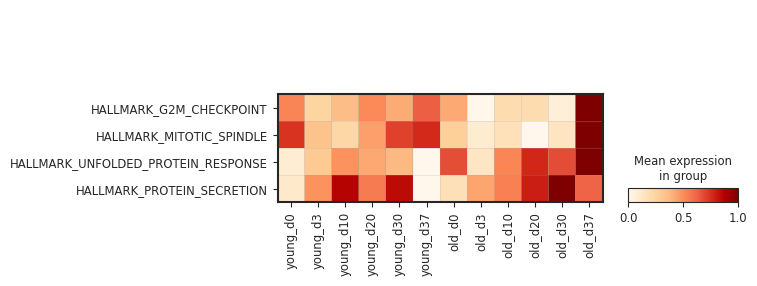

In [16]:
# Cluster 5
# MSigDB
HALLMARK_G2M_CHECKPOINT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_G2M_CHECKPOINT"]
HALLMARK_G2M_CHECKPOINT = HALLMARK_G2M_CHECKPOINT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_G2M_CHECKPOINT, score_name = "HALLMARK_G2M_CHECKPOINT")

HALLMARK_MITOTIC_SPINDLE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MITOTIC_SPINDLE"]
HALLMARK_MITOTIC_SPINDLE = HALLMARK_MITOTIC_SPINDLE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MITOTIC_SPINDLE, score_name = "HALLMARK_MITOTIC_SPINDLE")

HALLMARK_UNFOLDED_PROTEIN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"]
HALLMARK_UNFOLDED_PROTEIN_RESPONSE = HALLMARK_UNFOLDED_PROTEIN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_UNFOLDED_PROTEIN_RESPONSE, score_name = "HALLMARK_UNFOLDED_PROTEIN_RESPONSE")

HALLMARK_PROTEIN_SECRETION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_PROTEIN_SECRETION"]
HALLMARK_PROTEIN_SECRETION = HALLMARK_PROTEIN_SECRETION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_PROTEIN_SECRETION, score_name = "HALLMARK_PROTEIN_SECRETION")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_G2M_CHECKPOINT", "HALLMARK_MITOTIC_SPINDLE", "HALLMARK_UNFOLDED_PROTEIN_RESPONSE", "HALLMARK_PROTEIN_SECRETION"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

In [ ]:
# Cluster 6 Not Applicable
# MSigDB
REPLACE_A = hallmark_table.loc[hallmark_table["gs_name"] == "REPLACE_A"]
REPLACE_A = REPLACE_A["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = REPLACE_A, score_name = "REPLACE_A")

REPLACE_B = hallmark_table.loc[hallmark_table["gs_name"] == "REPLACE_B"]
REPLACE_B = REPLACE_B["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = REPLACE_B, score_name = "REPLACE_B")

REPLACE_C = hallmark_table.loc[hallmark_table["gs_name"] == "REPLACE_C"]
REPLACE_C = REPLACE_C["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = REPLACE_C, score_name = "REPLACE_C")

REPLACE_D = hallmark_table.loc[hallmark_table["gs_name"] == "REPLACE_D"]
REPLACE_D = REPLACE_D["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = REPLACE_D, score_name = "REPLACE_D")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["REPLACE_A", "REPLACE_B", "REPLACE_C", "REPLACE_D"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_INTERFERON_ALPHA_RESPONSE'
    finished: added
    'HALLMARK_INTERFERON_ALPHA_RESPONSE', score of gene set (adata.obs).
    599 total control genes are used. (0:00:04)
computing score 'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
    finished: added
    'HALLMARK_OXIDATIVE_PHOSPHORYLATION', score of gene set (adata.obs).
    591 total control genes are used. (0:00:04)
computing score 'HALLMARK_ALLOGRAFT_REJECTION'
    finished: added
    'HALLMARK_ALLOGRAFT_REJECTION', score of gene set (adata.obs).
    940 total control genes are used. (0:00:04)
computing score 'HALLMARK_MYC_TARGETS_V1'
    finished: added
    'HALLMARK_MYC_TARGETS_V1', score of gene set (adata.obs).
    553 total control genes are used. (0:00:04)


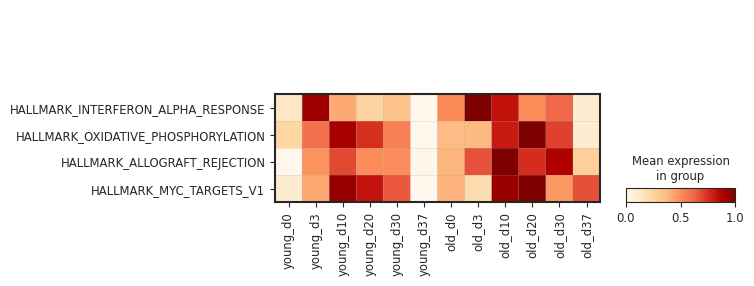

In [18]:
# Cluster 7
# MSigDB
HALLMARK_INTERFERON_ALPHA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_ALPHA_RESPONSE"]
HALLMARK_INTERFERON_ALPHA_RESPONSE = HALLMARK_INTERFERON_ALPHA_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_ALPHA_RESPONSE, score_name = "HALLMARK_INTERFERON_ALPHA_RESPONSE")

HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

HALLMARK_MYC_TARGETS_V1 = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MYC_TARGETS_V1"]
HALLMARK_MYC_TARGETS_V1 = HALLMARK_MYC_TARGETS_V1["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MYC_TARGETS_V1, score_name = "HALLMARK_MYC_TARGETS_V1")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_INTERFERON_ALPHA_RESPONSE", "HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_ALLOGRAFT_REJECTION", "HALLMARK_MYC_TARGETS_V1"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION'
    finished: added
    'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', score of gene set (adata.obs).
    1047 total control genes are used. (0:00:04)
computing score 'HALLMARK_MTORC1_SIGNALING'
    finished: added
    'HALLMARK_MTORC1_SIGNALING', score of gene set (adata.obs).
    594 total control genes are used. (0:00:04)
computing score 'HALLMARK_MYC_TARGETS_V1'
    finished: added
    'HALLMARK_MYC_TARGETS_V1', score of gene set (adata.obs).
    553 total control genes are used. (0:00:05)


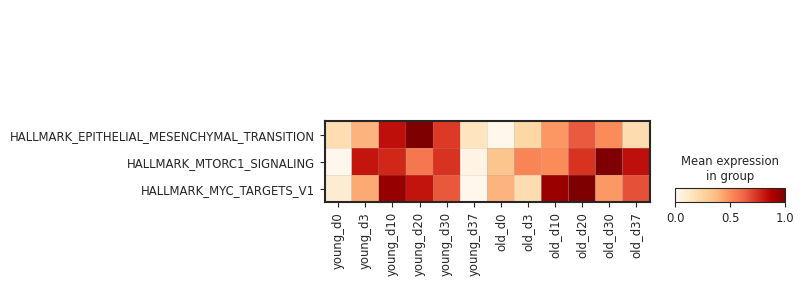

In [20]:
# Cluster 8
# MSigDB
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, score_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

HALLMARK_MYC_TARGETS_V1 = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MYC_TARGETS_V1"]
HALLMARK_MYC_TARGETS_V1 = HALLMARK_MYC_TARGETS_V1["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MYC_TARGETS_V1, score_name = "HALLMARK_MYC_TARGETS_V1")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION", "HALLMARK_MTORC1_SIGNALING", "HALLMARK_MYC_TARGETS_V1"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

### GO Pathways

In [15]:
%%R
library("org.Mm.eg.db")

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:gdata’:

    combine

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Biocond

In [16]:
%%R
columns(org.Mm.eg.db)

 [1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MGI"         
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROSITE"      "REFSEQ"       "SYMBOL"       "UNIPROT"     


In [17]:
%%R
c1_gene_table <- select(org.Mm.eg.db, keys = c("GO:0006508", "GO:2001233", "GO:0045047", "GO:0019885"), columns = "SYMBOL", keytype = "GO")
c2_gene_table <- select(org.Mm.eg.db, keys = c("GO:0050853"), columns = "SYMBOL", keytype = "GO")
c3_gene_table <- select(org.Mm.eg.db, keys = c("GO:0042254", "GO:0043161", "GO:0006325", "GO:0042981"), columns = "SYMBOL", keytype = "GO")
c4_gene_table <- select(org.Mm.eg.db, keys = c("GO:0002181", "GO:0045333", "GO:2001243", "GO:0010564"), columns = "SYMBOL", keytype = "GO")
c5_gene_table <- select(org.Mm.eg.db, keys = c("GO:0051128", "GO:0034976", "GO:0006974", "GO:2000114"), columns = "SYMBOL", keytype = "GO")
c6_gene_table <- select(org.Mm.eg.db, keys = c("GO:0002181", "GO:0045577", "GO:0070269", "GO:2000736"), columns = "SYMBOL", keytype = "GO")
c7_gene_table <- select(org.Mm.eg.db, keys = c("GO:0050852", "GO:0002693", "GO:0050851", "GO:0030593"), columns = "SYMBOL", keytype = "GO")
c8_gene_table <- select(org.Mm.eg.db, keys = c("GO:0010591", "GO:0010592"), columns = "SYMBOL", keytype = "GO")
c9_gene_table <- select(org.Mm.eg.db, keys = c("GO:0071772", "GO:0002693", "GO:2001212", "GO:0045446"), columns = "SYMBOL", keytype = "GO")


'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


In [27]:
%%R
select(org.Mm.eg.db, keys = c("GO:0002693"), columns = "SYMBOL", keytype = "GO")

           GO EVIDENCE ONTOLOGY SYMBOL
1  GO:0002693      IBA       BP  Adam8
2  GO:0002693      IMP       BP  Adam8
3  GO:0002693      ISO       BP  Icam1
4  GO:0002693      ISO       BP Pecam1
5  GO:0002693      ISO       BP  Ptafr
6  GO:0002693      ISO       BP   Ccl2
7  GO:0002693      ISO       BP   Thy1
8  GO:0002693      IBA       BP  Plvap
9  GO:0002693      IMP       BP  Plvap
10 GO:0002693      ISO       BP  Plvap
11 GO:0002693      ISO       BP  Lyve1


'select()' returned 1:many mapping between keys and columns


In [10]:
%%R
write.csv(c1_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_1_go_gene_sets.csv", row.names = FALSE)
write.csv(c2_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_2_go_gene_sets.csv", row.names = FALSE)
write.csv(c3_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_3_go_gene_sets.csv", row.names = FALSE)
write.csv(c4_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_4_go_gene_sets.csv", row.names = FALSE)
write.csv(c5_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_5_go_gene_sets.csv", row.names = FALSE)
write.csv(c6_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_6_go_gene_sets.csv", row.names = FALSE)
write.csv(c7_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_7_go_gene_sets.csv", row.names = FALSE)
write.csv(c8_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_8_go_gene_sets.csv", row.names = FALSE)
write.csv(c9_gene_table, "/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_9_go_gene_sets.csv", row.names = FALSE)


In [18]:
c1_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_1_go_gene_sets.csv")
c2_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_2_go_gene_sets.csv")
c3_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_3_go_gene_sets.csv")
c4_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_4_go_gene_sets.csv")
c5_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_5_go_gene_sets.csv")
c6_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_6_go_gene_sets.csv")
c7_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_7_go_gene_sets.csv")
c8_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_8_go_gene_sets.csv")
c9_gene_table = pd.read_csv("/home/davidlauer/data/LungAging/data/Splines_clustering/pathway_scores/cluster_9_go_gene_sets.csv")


computing score 'Proteolysis'
       'Adam34', 'Mcpt9', 'Otud6a', 'Gzmg', 'Pip', 'Tmprss11a', 'Prss58',
       'Usp17lc', 'Ctsj', 'Sva', 'Sppl2c', 'Ddi1', 'Sval3', 'Klk12', 'Prss45',
       'Cpa1', 'Adam6a', 'Adam2', 'Cela3a', 'Prss52', 'Tmprss11c', 'Prss3b',
       'Adam25', 'Prss1l', 'Prss3', 'Klk1b24', 'Prss1', 'Tmprss11f', 'Prss29',
       'Adam20', 'Matcap1', 'Mbl2', 'Mep1b', 'Prss21', 'Cpa5', 'Adam24',
       'Brcc3dc', 'Ctsm', 'Ren2', 'Actmap', 'Gzmd', 'Tmprss11b', 'Usp17lb',
       'Pepc', 'Ctsr', 'Adam26b', 'Mmp1a', 'Cts8', 'Adam29', 'Nrdc',
       'Tmprss15', 'Cts7', 'Prss44', 'Klk1b1', 'Klk1b22', 'Ovch2', 'Try4',
       'Adam34l', 'Try5', 'Cirop', 'Prss40', 'Prss56', 'Mmp1b', 'Prss54',
       'Prss37', 'Matcap2', 'Clca4a', 'Ctrb1', 'Cfhr4', 'Casp14', 'Prss48',
       'Gzmf', 'Trhde', 'Rbp3', 'Klk4', 'Usp17la', 'Klk1b3', 'Adam39',
       'Prss3l', 'Sval2'],
      dtype='object')
    finished: added
    'Proteolysis', score of gene set (adata.obs).
    1181 total control genes

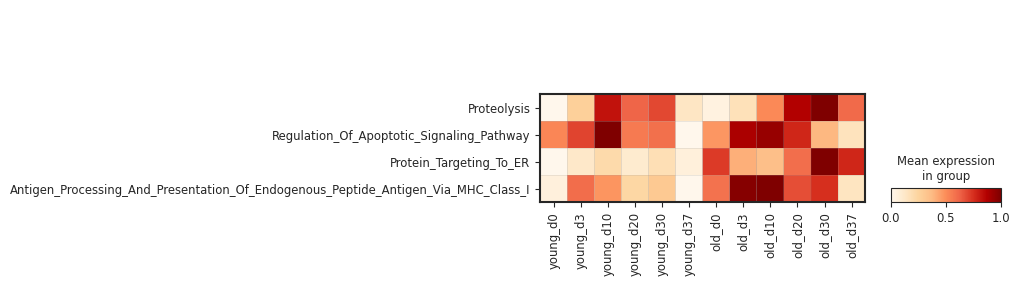

In [78]:
# Cluster 1
# Gene Ontology
Proteolysis = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0006508"]
Proteolysis = Proteolysis["SYMBOL"].values.tolist()
Proteolysis = list(set(Proteolysis))
sc.tl.score_genes(adata, gene_list = Proteolysis, score_name = "Proteolysis")

Regulation_Of_Apoptotic_Signaling_Pathway = c1_gene_table.loc[c1_gene_table["GO"] == "GO:2001233"]
Regulation_Of_Apoptotic_Signaling_Pathway = Regulation_Of_Apoptotic_Signaling_Pathway["SYMBOL"].values.tolist()
Regulation_Of_Apoptotic_Signaling_Pathway = list(set(Regulation_Of_Apoptotic_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Apoptotic_Signaling_Pathway, score_name = "Regulation_Of_Apoptotic_Signaling_Pathway")

Protein_Targeting_To_ER = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0045047"]
Protein_Targeting_To_ER = Protein_Targeting_To_ER["SYMBOL"].values.tolist()
Protein_Targeting_To_ER = list(set(Protein_Targeting_To_ER))
sc.tl.score_genes(adata, gene_list = Protein_Targeting_To_ER, score_name = "Protein_Targeting_To_ER")

Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0019885"]
Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I["SYMBOL"].values.tolist()
Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = list(set(Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I))
sc.tl.score_genes(adata, gene_list = Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I, score_name = "Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Proteolysis", "Regulation_Of_Apoptotic_Signaling_Pathway", "Protein_Targeting_To_ER", "Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'B_Cell_Receptor_Signaling_Pathway'
    finished: added
    'B_Cell_Receptor_Signaling_Pathway', score of gene set (adata.obs).
    548 total control genes are used. (0:00:00)


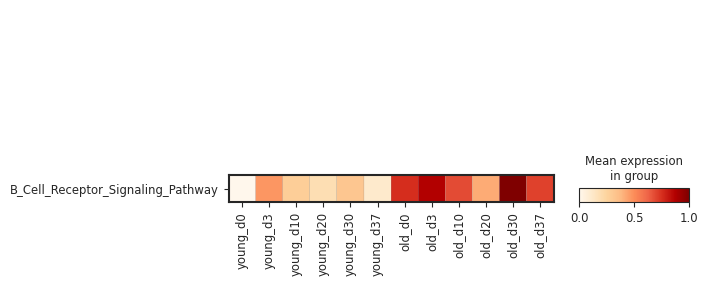

In [82]:
# Cluster 2
# Gene Ontology
B_Cell_Receptor_Signaling_Pathway = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0050853"]
B_Cell_Receptor_Signaling_Pathway = B_Cell_Receptor_Signaling_Pathway["SYMBOL"].values.tolist()
B_Cell_Receptor_Signaling_Pathway = list(set(B_Cell_Receptor_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = B_Cell_Receptor_Signaling_Pathway, score_name = "B_Cell_Receptor_Signaling_Pathway")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["B_Cell_Receptor_Signaling_Pathway"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'Ribosome_Biogenesis'
    finished: added
    'Ribosome_Biogenesis', score of gene set (adata.obs).
    498 total control genes are used. (0:00:00)
computing score 'Proteasome-Mediated_Ubiquitin-Dependent_Protein_Catabolic_Process'
       'Znrf4', 'Tdpoz4', 'Gba1', 'Tdpoz5', 'Tdpoz1', 'Tdpoz6', 'Bmal1',
       'Tdpoz9', 'Marchf6', 'Spopfm3'],
      dtype='object')
    finished: added
    'Proteasome-Mediated_Ubiquitin-Dependent_Protein_Catabolic_Process', score of gene set (adata.obs).
    946 total control genes are used. (0:00:00)
computing score 'Chromatin_Organization'
       'Mexis', 'Bmncr', 'Hymai', 'H2bc1', 'Macroh2a2', 'Macroh2a1', 'H1f9',
       'H2ac4', 'H1f4', 'Reno1'],
      dtype='object')
    finished: added
    'Chromatin_Organization', score of gene set (adata.obs).
    1039 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Apoptotic_Process'
       'Usp17le', 'Mir290a', 'Usp17lb', 'Usp17la', 'Moap1', 'Alx3', 'Pax2',
       'Fate1']

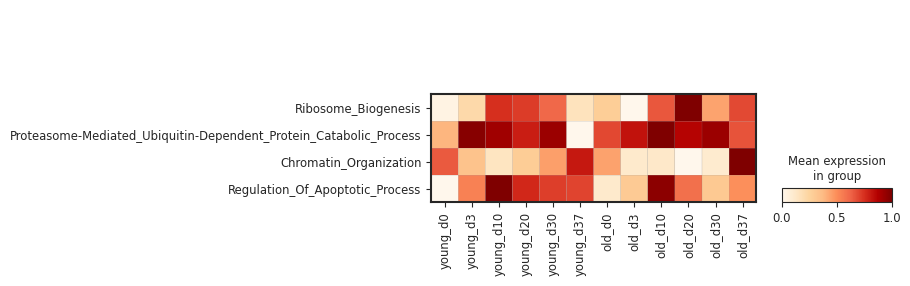

In [84]:
# Cluster 3
# Gene Ontology
Ribosome_Biogenesis = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0042254"]
Ribosome_Biogenesis = Ribosome_Biogenesis["SYMBOL"].values.tolist()
Ribosome_Biogenesis = list(set(Ribosome_Biogenesis))
sc.tl.score_genes(adata, gene_list = Ribosome_Biogenesis, score_name = "Ribosome_Biogenesis")

Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0043161"]
Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process["SYMBOL"].values.tolist()
Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = list(set(Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process))
sc.tl.score_genes(adata, gene_list = Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process, score_name = "Proteasome-Mediated_Ubiquitin-Dependent_Protein_Catabolic_Process")

Chromatin_Organization = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0006325"]
Chromatin_Organization = Chromatin_Organization["SYMBOL"].values.tolist()
Chromatin_Organization = list(set(Chromatin_Organization))
sc.tl.score_genes(adata, gene_list = Chromatin_Organization, score_name = "Chromatin_Organization")

Regulation_Of_Apoptotic_Process = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0042981"]
Regulation_Of_Apoptotic_Process = Regulation_Of_Apoptotic_Process["SYMBOL"].values.tolist()
Regulation_Of_Apoptotic_Process = list(set(Regulation_Of_Apoptotic_Process))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Apoptotic_Process, score_name = "Regulation_Of_Apoptotic_Process")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Ribosome_Biogenesis", "Proteasome-Mediated_Ubiquitin-Dependent_Protein_Catabolic_Process", "Chromatin_Organization", "Regulation_Of_Apoptotic_Process"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'Cytoplasmic_Translation'
    finished: added
    'Cytoplasmic_Translation', score of gene set (adata.obs).
    448 total control genes are used. (0:00:00)
computing score 'Cellular_Respiration'
    finished: added
    'Cellular_Respiration', score of gene set (adata.obs).
    500 total control genes are used. (0:00:00)
computing score 'Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway'
    finished: added
    'Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway', score of gene set (adata.obs).
    650 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Cell_Cycle_Process'
    finished: added
    'Regulation_Of_Cell_Cycle_Process', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)


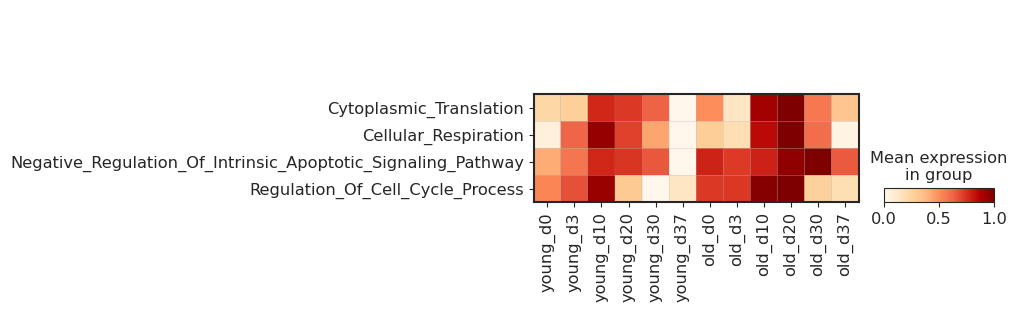

In [13]:
# Cluster 4
# Gene Ontology
Cytoplasmic_Translation = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0002181"]
Cytoplasmic_Translation = Cytoplasmic_Translation["SYMBOL"].values.tolist()
Cytoplasmic_Translation = list(set(Cytoplasmic_Translation))
sc.tl.score_genes(adata, gene_list = Cytoplasmic_Translation, score_name = "Cytoplasmic_Translation")

Cellular_Respiration = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0045333"]
Cellular_Respiration = Cellular_Respiration["SYMBOL"].values.tolist()
Cellular_Respiration = list(set(Cellular_Respiration))
sc.tl.score_genes(adata, gene_list = Cellular_Respiration, score_name = "Cellular_Respiration")

Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = c4_gene_table.loc[c4_gene_table["GO"] == "GO:2001243"]
Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway["SYMBOL"].values.tolist()
Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = list(set(Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway, score_name = "Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway")

Regulation_Of_Cell_Cycle_Process = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0010564"]
Regulation_Of_Cell_Cycle_Process = Regulation_Of_Cell_Cycle_Process["SYMBOL"].values.tolist()
Regulation_Of_Cell_Cycle_Process = list(set(Regulation_Of_Cell_Cycle_Process))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Cell_Cycle_Process, score_name = "Regulation_Of_Cell_Cycle_Process")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Cytoplasmic_Translation", "Cellular_Respiration", "Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway", "Regulation_Of_Cell_Cycle_Process"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'Regulation_Of_Cellular_Component_Organization'
    finished: added
    'Regulation_Of_Cellular_Component_Organization', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)
computing score 'Response_To_Endoplasmic_Reticulum_Stress'
    finished: added
    'Response_To_Endoplasmic_Reticulum_Stress', score of gene set (adata.obs).
    894 total control genes are used. (0:00:00)
computing score 'DNA_Damage_Response'
       'Nkx3-1', 'H2ax', 'Mael', 'Trex1', 'Uba1y', 'Shld3', 'Ppp4r3c2'],
      dtype='object')
    finished: added
    'DNA_Damage_Response', score of gene set (adata.obs).
    926 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Establishment_Of_Cell_Polarity'
    finished: added
    'Regulation_Of_Establishment_Of_Cell_Polarity', score of gene set (adata.obs).
    400 total control genes are used. (0:00:00)


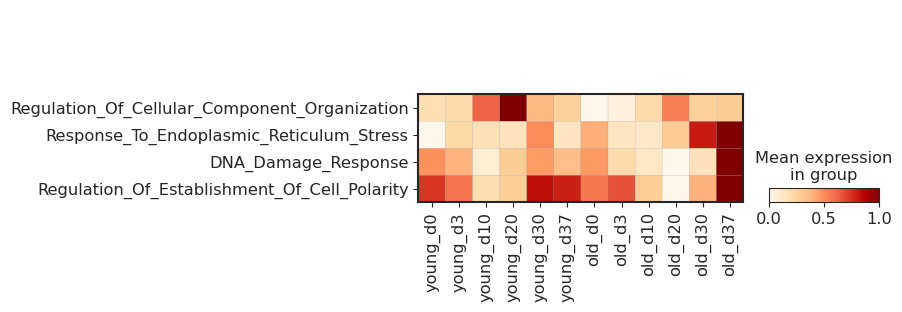

In [14]:
# Cluster 5
# Gene Ontology
Regulation_Of_Cellular_Component_Organization = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0051128"]
Regulation_Of_Cellular_Component_Organization = Regulation_Of_Cellular_Component_Organization["SYMBOL"].values.tolist()
Regulation_Of_Cellular_Component_Organization = list(set(Regulation_Of_Cellular_Component_Organization))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Cellular_Component_Organization, score_name = "Regulation_Of_Cellular_Component_Organization")

Response_To_Endoplasmic_Reticulum_Stress = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0034976"]
Response_To_Endoplasmic_Reticulum_Stress = Response_To_Endoplasmic_Reticulum_Stress["SYMBOL"].values.tolist()
Response_To_Endoplasmic_Reticulum_Stress = list(set(Response_To_Endoplasmic_Reticulum_Stress))
sc.tl.score_genes(adata, gene_list = Response_To_Endoplasmic_Reticulum_Stress, score_name = "Response_To_Endoplasmic_Reticulum_Stress")

DNA_Damage_Response = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0006974"]
DNA_Damage_Response = DNA_Damage_Response["SYMBOL"].values.tolist()
DNA_Damage_Response = list(set(DNA_Damage_Response))
sc.tl.score_genes(adata, gene_list = DNA_Damage_Response, score_name = "DNA_Damage_Response")

Regulation_Of_Establishment_Of_Cell_Polarity = c5_gene_table.loc[c5_gene_table["GO"] == "GO:2000114"]
Regulation_Of_Establishment_Of_Cell_Polarity = Regulation_Of_Establishment_Of_Cell_Polarity["SYMBOL"].values.tolist()
Regulation_Of_Establishment_Of_Cell_Polarity = list(set(Regulation_Of_Establishment_Of_Cell_Polarity))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Establishment_Of_Cell_Polarity, score_name = "Regulation_Of_Establishment_Of_Cell_Polarity")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Regulation_Of_Cellular_Component_Organization", "Response_To_Endoplasmic_Reticulum_Stress", "DNA_Damage_Response", "Regulation_Of_Establishment_Of_Cell_Polarity"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'Regulation_Of_Establishment_Of_Cell_Polarity'
    finished: added
    'Regulation_Of_Establishment_Of_Cell_Polarity', score of gene set (adata.obs).
    448 total control genes are used. (0:00:00)
computing score 'Regulation_Of_B_Cell_Differentiation'
    finished: added
    'Regulation_Of_B_Cell_Differentiation', score of gene set (adata.obs).
    350 total control genes are used. (0:00:00)
computing score 'Pyroptosis'
    finished: added
    'Pyroptosis', score of gene set (adata.obs).
    797 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Stem_Cell_Differentiation'
    finished: added
    'Regulation_Of_Stem_Cell_Differentiation', score of gene set (adata.obs).
    399 total control genes are used. (0:00:00)


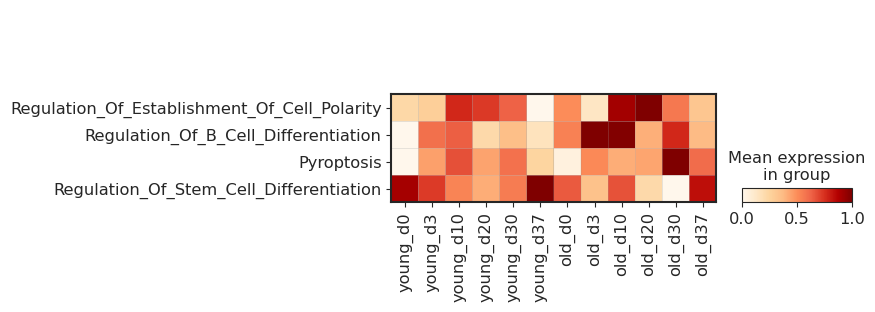

In [15]:
# Cluster 6
# Gene Ontology
Regulation_Of_Establishment_Of_Cell_Polarity = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0002181"]
Regulation_Of_Establishment_Of_Cell_Polarity = Regulation_Of_Establishment_Of_Cell_Polarity["SYMBOL"].values.tolist()
Regulation_Of_Establishment_Of_Cell_Polarity = list(set(Regulation_Of_Establishment_Of_Cell_Polarity))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Establishment_Of_Cell_Polarity, score_name = "Regulation_Of_Establishment_Of_Cell_Polarity")

Regulation_Of_B_Cell_Differentiation = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0045577"]
Regulation_Of_B_Cell_Differentiation = Regulation_Of_B_Cell_Differentiation["SYMBOL"].values.tolist()
Regulation_Of_B_Cell_Differentiation = list(set(Regulation_Of_B_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Regulation_Of_B_Cell_Differentiation, score_name = "Regulation_Of_B_Cell_Differentiation")

Pyroptosis = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0070269"]
Pyroptosis = Pyroptosis["SYMBOL"].values.tolist()
Pyroptosis = list(set(Pyroptosis))
sc.tl.score_genes(adata, gene_list = Pyroptosis, score_name = "Pyroptosis")

Regulation_Of_Stem_Cell_Differentiation = c6_gene_table.loc[c6_gene_table["GO"] == "GO:2000736"]
Regulation_Of_Stem_Cell_Differentiation = Regulation_Of_Stem_Cell_Differentiation["SYMBOL"].values.tolist()
Regulation_Of_Stem_Cell_Differentiation = list(set(Regulation_Of_Stem_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Stem_Cell_Differentiation, score_name = "Regulation_Of_Stem_Cell_Differentiation")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Regulation_Of_Establishment_Of_Cell_Polarity", "Regulation_Of_B_Cell_Differentiation", "Pyroptosis", "Regulation_Of_Stem_Cell_Differentiation"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'T_Cell_Receptor_Signaling_Pathway'
       'Skint9', 'Skint2', 'Skint7', 'Btnl12', 'Skint1', 'Skint5'],
      dtype='object')
    finished: added
    'T_Cell_Receptor_Signaling_Pathway', score of gene set (adata.obs).
    1096 total control genes are used. (0:00:00)
computing score 'Positive_Regulation_Of_Cellular_Extravasation'
    finished: added
    'Positive_Regulation_Of_Cellular_Extravasation', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)
computing score 'Antigen_Receptor_Mediated_Signaling_Pathway'
    finished: added
    'Antigen_Receptor_Mediated_Signaling_Pathway', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)
computing score 'Neutrophil_Chemotaxis'
    finished: added
    'Neutrophil_Chemotaxis', score of gene set (adata.obs).
    795 total control genes are used. (0:00:00)


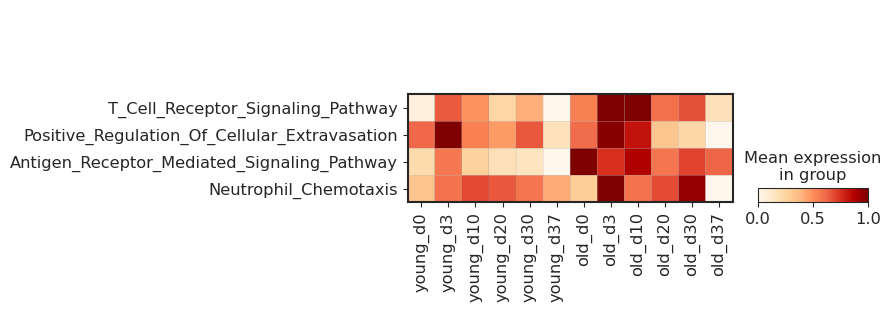

In [16]:
# Cluster 7
# Gene Ontology
T_Cell_Receptor_Signaling_Pathway = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0050852"]
T_Cell_Receptor_Signaling_Pathway = T_Cell_Receptor_Signaling_Pathway["SYMBOL"].values.tolist()
T_Cell_Receptor_Signaling_Pathway = list(set(T_Cell_Receptor_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = T_Cell_Receptor_Signaling_Pathway, score_name = "T_Cell_Receptor_Signaling_Pathway")

Positive_Regulation_Of_Cellular_Extravasation = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0002693"]
Positive_Regulation_Of_Cellular_Extravasation = Positive_Regulation_Of_Cellular_Extravasation["SYMBOL"].values.tolist()
Positive_Regulation_Of_Cellular_Extravasation = list(set(Positive_Regulation_Of_Cellular_Extravasation))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Cellular_Extravasation, score_name = "Positive_Regulation_Of_Cellular_Extravasation")

Antigen_Receptor_Mediated_Signaling_Pathway = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0050851"]
Antigen_Receptor_Mediated_Signaling_Pathway = Antigen_Receptor_Mediated_Signaling_Pathway["SYMBOL"].values.tolist()
Antigen_Receptor_Mediated_Signaling_Pathway = list(set(Antigen_Receptor_Mediated_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Antigen_Receptor_Mediated_Signaling_Pathway, score_name = "Antigen_Receptor_Mediated_Signaling_Pathway")

Neutrophil_Chemotaxis = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0030593"]
Neutrophil_Chemotaxis = Neutrophil_Chemotaxis["SYMBOL"].values.tolist()
Neutrophil_Chemotaxis = list(set(Neutrophil_Chemotaxis))
sc.tl.score_genes(adata, gene_list = Neutrophil_Chemotaxis, score_name = "Neutrophil_Chemotaxis")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["T_Cell_Receptor_Signaling_Pathway", "Positive_Regulation_Of_Cellular_Extravasation", "Antigen_Receptor_Mediated_Signaling_Pathway", "Neutrophil_Chemotaxis"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'Neutrophil_Chemotaxis'
    finished: added
    'Neutrophil_Chemotaxis', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)
computing score 'Positive_Regulation_Of_Lamellipodium_Assembly'
    finished: added
    'Positive_Regulation_Of_Lamellipodium_Assembly', score of gene set (adata.obs).
    597 total control genes are used. (0:00:00)


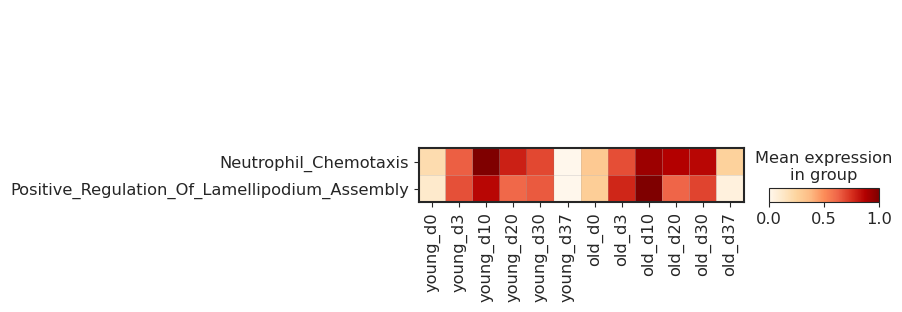

In [17]:
# Cluster 8
# Gene Ontology
Neutrophil_Chemotaxis = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010591"]
Neutrophil_Chemotaxis = Neutrophil_Chemotaxis["SYMBOL"].values.tolist()
Neutrophil_Chemotaxis = list(set(Neutrophil_Chemotaxis))
sc.tl.score_genes(adata, gene_list = Neutrophil_Chemotaxis, score_name = "Neutrophil_Chemotaxis")

Positive_Regulation_Of_Lamellipodium_Assembly = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010592"]
Positive_Regulation_Of_Lamellipodium_Assembly = Positive_Regulation_Of_Lamellipodium_Assembly["SYMBOL"].values.tolist()
Positive_Regulation_Of_Lamellipodium_Assembly = list(set(Positive_Regulation_Of_Lamellipodium_Assembly))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Lamellipodium_Assembly, score_name = "Positive_Regulation_Of_Lamellipodium_Assembly")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Neutrophil_Chemotaxis", "Positive_Regulation_Of_Lamellipodium_Assembly"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

computing score 'Response_To_BMP'
       'Micos10-nbl1', 'Mir100', 'Mir106a', 'Mir125b1', 'Mir140', 'Mir195',
       'Mir199a1', 'Mir199b', 'Mir20a', 'Mir21', 'Mir210', 'Mir214', 'Mir26a1',
       'Mir302c', 'Mir30b', 'Mir885', 'Mir93', 'Mir98', 'Msx2', 'Skor2',
       'Smad5-as1', 'Spart', 'Usp9y', 'Znf423', 'Znf8'],
      dtype='object')
    finished: added
    'Response_To_BMP', score of gene set (adata.obs).
    1143 total control genes are used. (0:00:00)
computing score 'Positive_Regulation_Of_Cellular_Extravasation'
    finished: added
    'Positive_Regulation_Of_Cellular_Extravasation', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)
computing score 'Regulation_Of_Vasculogenesis'
    finished: added
    'Regulation_Of_Vasculogenesis', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)
computing score 'Endothelial_Cell_Differentiation'
    finished: added
    'Endothelial_Cell_Differentiation', score of gene set (adata.o

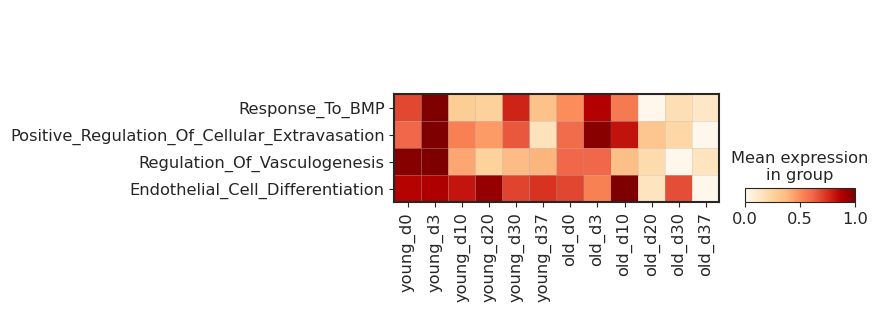

In [28]:
# Cluster 9
# Gene Ontology
Response_To_BMP = "ABL1,ACVR1,ACVR2A,ACVR2B,ACVRL1,ADAMTS12,ADAMTS7,AMHR2,ARK2C,ATF2,BAMBI,BMP10,BMP2,BMP4,BMP5,BMP6,BMP7,BMPER,BMPR1A,BMPR1B,BMPR2,CCN1,CDH5,CER1,CHRD,CHRDL1,CHRDL2,COL2A1,COMP,CRB2,CRIM1,CTDSPL2,DAND5,DDX5,DKK1,DLX1,DLX3,DLX5,DSG4,EGR1,ELAPOR2,ENG,ETV2,EXT1,FAM83G,FBN1,FBXL15,FKBP8,FOXD1,FST,FSTL1,FSTL3,FSTL4,FSTL5,FZD1,GATA3,GATA4,GATA5,GATA6,GDF2,GDF3,GDF5,GDF6,GDF7,GPC3,GPR155,GREM1,GREM2,HES1,HES5,HEYL,HFE,HIPK2,HIVEP1,HJV,HOXA13,HTRA1,HTRA3,ILK,ITGA3,KCP,KDR,LEF1,LEMD3,LRP2,MAPK3,MEGF8,MICOS10-NBL1,MIR100,MIR106A,MIR125B1,MIR140,MIR195,MIR199A1,MIR199B,MIR20A,MIR21,MIR210,MIR214,MIR26A1,MIR302C,MIR30B,MIR885,MIR93,MIR98,MSX1,MSX2,MTMR4,NBL1,NEO1,NFIA,NOG,NOTCH1,NOTCH2,NUMA1,PCSK6,PDCD4,PELO,PHOX2B,PPARG,PPM1A,PRMT1,RBPJ,RBPMS2,RGMA,RGMB,RUNX2,SCUBE3,SCX,SFRP1,SFRP2,SFRP4,SKI,SKIL,SKOR1,SKOR2,SLC39A5,SMAD1,SMAD2,SMAD4,SMAD5,SMAD5-AS1,SMAD6,SMAD7,SMAD9,SMPD3,SMURF1,SMURF2,SORL1,SOST,SOSTDC1,SOX11,SOX9,SPART,SPINT1,SPINT2,SULF1,TBX20,TFAP2B,TGFBR3,TMEM100,TMEM53,TMPRSS6,TNFAIP6,TOB1,TRIM33,TWSG1,UBE2D1,UBE2D3,UBE2O,USP15,USP9X,USP9Y,VSTM2A,VWC2,VWC2L,WNT1,WNT5A,XIAP,ZNF423,ZNF8"
Response_To_BMP = Convert(Response_To_BMP)
Response_To_BMP = [item.capitalize() for item in Response_To_BMP]
sc.tl.score_genes(adata, gene_list = Response_To_BMP, score_name = "Response_To_BMP")

Positive_Regulation_Of_Cellular_Extravasation = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0002693"]
Positive_Regulation_Of_Cellular_Extravasation = Positive_Regulation_Of_Cellular_Extravasation["SYMBOL"].values.tolist()
Positive_Regulation_Of_Cellular_Extravasation = list(set(Positive_Regulation_Of_Cellular_Extravasation))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Cellular_Extravasation, score_name = "Positive_Regulation_Of_Cellular_Extravasation")

Regulation_Of_Vasculogenesis = c9_gene_table.loc[c9_gene_table["GO"] == "GO:2001212"]
Regulation_Of_Vasculogenesis = Regulation_Of_Vasculogenesis["SYMBOL"].values.tolist()
Regulation_Of_Vasculogenesis = list(set(Regulation_Of_Vasculogenesis))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Vasculogenesis, score_name = "Regulation_Of_Vasculogenesis")

Endothelial_Cell_Differentiation = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0045446"]
Endothelial_Cell_Differentiation = Endothelial_Cell_Differentiation["SYMBOL"].values.tolist()
Endothelial_Cell_Differentiation = list(set(Endothelial_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Endothelial_Cell_Differentiation, score_name = "Endothelial_Cell_Differentiation")

sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Response_To_BMP", "Positive_Regulation_Of_Cellular_Extravasation", "Regulation_Of_Vasculogenesis", "Endothelial_Cell_Differentiation"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd")

## MSigDB + GO Summary Heatmap

computing score 'Proteolysis'
       'Sval3', 'Adam34l', 'Try5', 'Cpa5', 'Actmap', 'Mcpt9', 'Klk1b1', 'Nrdc',
       'Adam25', 'Cirop', 'Ddi1', 'Otud6a', 'Casp14', 'Pip', 'Gzmd', 'Cela3a',
       'Trhde', 'Gzmg', 'Sval2', 'Try4', 'Adam24', 'Adam6a', 'Prss29',
       'Tmprss15', 'Prss3l', 'Mbl2', 'Klk1b24', 'Ctrb1', 'Tmprss11c', 'Ovch2',
       'Pepc', 'Egfbp2', 'Prss1l', 'Adam39', 'Ctsm', 'Brcc3dc', 'Ren2',
       'Adam26a', 'Cts7', 'Adam20', 'Cfhr4', 'Tmprss11f', 'Klk1b16', 'Matcap2',
       'Usp17lc', 'Sppl2c', 'Cpa1', 'Klk1b22', 'Tmprss11a', 'Prss45',
       'Usp17la', 'Mep1b', 'Klk1b5', 'Prss54', 'Adam34', 'Sval1', 'Gzmf',
       'Mmp1a', 'Sva', 'Klk1b3', 'Usp17lb', 'Prss58', 'Matcap1', 'Prss40',
       'Pepb', 'Prss3b', 'Klk12', 'Rbp3', 'Adam29', 'Ctsj', 'Prss44', 'Prss1',
       'Klk4', 'Prss3', 'Clca4a', 'Adam26b', 'Prss52', 'Prss56', 'Prss48',
       'Adam2'],
      dtype='object')
    finished: added
    'Proteolysis', score of gene set (adata.obs).
    1181 total control gene

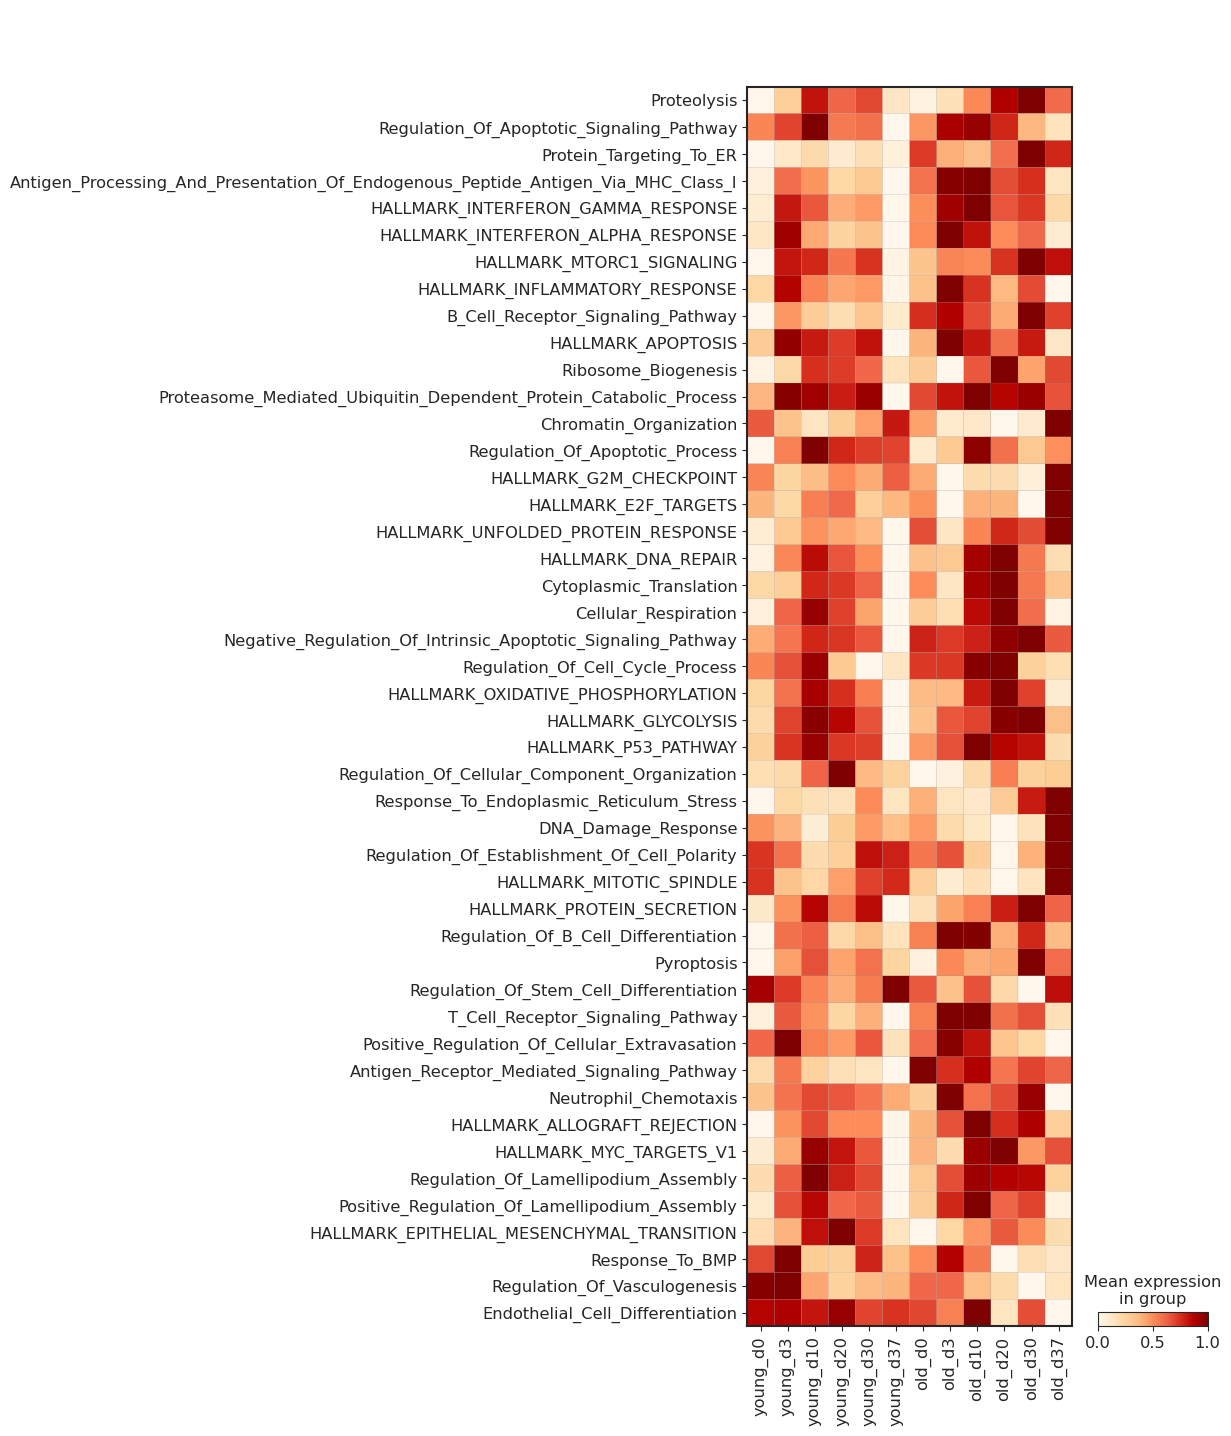

In [35]:
# Cluster 1
Proteolysis = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0006508"]
Proteolysis = Proteolysis["SYMBOL"].values.tolist()
Proteolysis = list(set(Proteolysis))
sc.tl.score_genes(adata, gene_list = Proteolysis, score_name = "Proteolysis")

Regulation_Of_Apoptotic_Signaling_Pathway = c1_gene_table.loc[c1_gene_table["GO"] == "GO:2001233"]
Regulation_Of_Apoptotic_Signaling_Pathway = Regulation_Of_Apoptotic_Signaling_Pathway["SYMBOL"].values.tolist()
Regulation_Of_Apoptotic_Signaling_Pathway = list(set(Regulation_Of_Apoptotic_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Apoptotic_Signaling_Pathway, score_name = "Regulation_Of_Apoptotic_Signaling_Pathway")

Protein_Targeting_To_ER = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0045047"]
Protein_Targeting_To_ER = Protein_Targeting_To_ER["SYMBOL"].values.tolist()
Protein_Targeting_To_ER = list(set(Protein_Targeting_To_ER))
sc.tl.score_genes(adata, gene_list = Protein_Targeting_To_ER, score_name = "Protein_Targeting_To_ER")

Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0019885"]
Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I["SYMBOL"].values.tolist()
Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = list(set(Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I))
sc.tl.score_genes(adata, gene_list = Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I, score_name = "Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I")

HALLMARK_INTERFERON_GAMMA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_GAMMA_RESPONSE"]
HALLMARK_INTERFERON_GAMMA_RESPONSE = HALLMARK_INTERFERON_GAMMA_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_GAMMA_RESPONSE, score_name = "HALLMARK_INTERFERON_GAMMA_RESPONSE")

HALLMARK_INTERFERON_ALPHA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_ALPHA_RESPONSE"]
HALLMARK_INTERFERON_ALPHA_RESPONSE = HALLMARK_INTERFERON_ALPHA_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_ALPHA_RESPONSE, score_name = "HALLMARK_INTERFERON_ALPHA_RESPONSE")

HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

HALLMARK_INFLAMMATORY_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INFLAMMATORY_RESPONSE"]
HALLMARK_INFLAMMATORY_RESPONSE = HALLMARK_INFLAMMATORY_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INFLAMMATORY_RESPONSE, score_name = "HALLMARK_INFLAMMATORY_RESPONSE")

# Cluster 2
B_Cell_Receptor_Signaling_Pathway = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0050853"]
B_Cell_Receptor_Signaling_Pathway = B_Cell_Receptor_Signaling_Pathway["SYMBOL"].values.tolist()
B_Cell_Receptor_Signaling_Pathway = list(set(B_Cell_Receptor_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = B_Cell_Receptor_Signaling_Pathway, score_name = "B_Cell_Receptor_Signaling_Pathway")

HALLMARK_APOPTOSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APOPTOSIS"]
HALLMARK_APOPTOSIS = HALLMARK_APOPTOSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_APOPTOSIS, score_name = "HALLMARK_APOPTOSIS")

# Cluster 3
Ribosome_Biogenesis = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0042254"]
Ribosome_Biogenesis = Ribosome_Biogenesis["SYMBOL"].values.tolist()
Ribosome_Biogenesis = list(set(Ribosome_Biogenesis))
sc.tl.score_genes(adata, gene_list = Ribosome_Biogenesis, score_name = "Ribosome_Biogenesis")

Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0043161"]
Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process["SYMBOL"].values.tolist()
Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = list(set(Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process))
sc.tl.score_genes(adata, gene_list = Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process, score_name = "Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process")

Chromatin_Organization = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0006325"]
Chromatin_Organization = Chromatin_Organization["SYMBOL"].values.tolist()
Chromatin_Organization = list(set(Chromatin_Organization))
sc.tl.score_genes(adata, gene_list = Chromatin_Organization, score_name = "Chromatin_Organization")

Regulation_Of_Apoptotic_Process = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0042981"]
Regulation_Of_Apoptotic_Process = Regulation_Of_Apoptotic_Process["SYMBOL"].values.tolist()
Regulation_Of_Apoptotic_Process = list(set(Regulation_Of_Apoptotic_Process))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Apoptotic_Process, score_name = "Regulation_Of_Apoptotic_Process")

HALLMARK_G2M_CHECKPOINT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_G2M_CHECKPOINT"]
HALLMARK_G2M_CHECKPOINT = HALLMARK_G2M_CHECKPOINT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_G2M_CHECKPOINT, score_name = "HALLMARK_G2M_CHECKPOINT")

HALLMARK_E2F_TARGETS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_E2F_TARGETS"]
HALLMARK_E2F_TARGETS = HALLMARK_E2F_TARGETS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_E2F_TARGETS, score_name = "HALLMARK_E2F_TARGETS")

HALLMARK_UNFOLDED_PROTEIN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"]
HALLMARK_UNFOLDED_PROTEIN_RESPONSE = HALLMARK_UNFOLDED_PROTEIN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_UNFOLDED_PROTEIN_RESPONSE, score_name = "HALLMARK_UNFOLDED_PROTEIN_RESPONSE")

HALLMARK_DNA_REPAIR = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_DNA_REPAIR"]
HALLMARK_DNA_REPAIR = HALLMARK_DNA_REPAIR["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_DNA_REPAIR, score_name = "HALLMARK_DNA_REPAIR")

# Cluster 4
Cytoplasmic_Translation = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0002181"]
Cytoplasmic_Translation = Cytoplasmic_Translation["SYMBOL"].values.tolist()
Cytoplasmic_Translation = list(set(Cytoplasmic_Translation))
sc.tl.score_genes(adata, gene_list = Cytoplasmic_Translation, score_name = "Cytoplasmic_Translation")

Cellular_Respiration = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0045333"]
Cellular_Respiration = Cellular_Respiration["SYMBOL"].values.tolist()
Cellular_Respiration = list(set(Cellular_Respiration))
sc.tl.score_genes(adata, gene_list = Cellular_Respiration, score_name = "Cellular_Respiration")

Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = c4_gene_table.loc[c4_gene_table["GO"] == "GO:2001243"]
Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway["SYMBOL"].values.tolist()
Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = list(set(Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway, score_name = "Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway")

Regulation_Of_Cell_Cycle_Process = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0010564"]
Regulation_Of_Cell_Cycle_Process = Regulation_Of_Cell_Cycle_Process["SYMBOL"].values.tolist()
Regulation_Of_Cell_Cycle_Process = list(set(Regulation_Of_Cell_Cycle_Process))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Cell_Cycle_Process, score_name = "Regulation_Of_Cell_Cycle_Process")

#HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
#HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_GLYCOLYSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_GLYCOLYSIS"]
HALLMARK_GLYCOLYSIS = HALLMARK_GLYCOLYSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_GLYCOLYSIS, score_name = "HALLMARK_GLYCOLYSIS")

HALLMARK_P53_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_P53_PATHWAY"]
HALLMARK_P53_PATHWAY = HALLMARK_P53_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_P53_PATHWAY, score_name = "HALLMARK_P53_PATHWAY")

# Cluster 5
Regulation_Of_Cellular_Component_Organization = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0051128"]
Regulation_Of_Cellular_Component_Organization = Regulation_Of_Cellular_Component_Organization["SYMBOL"].values.tolist()
Regulation_Of_Cellular_Component_Organization = list(set(Regulation_Of_Cellular_Component_Organization))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Cellular_Component_Organization, score_name = "Regulation_Of_Cellular_Component_Organization")

Response_To_Endoplasmic_Reticulum_Stress = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0034976"]
Response_To_Endoplasmic_Reticulum_Stress = Response_To_Endoplasmic_Reticulum_Stress["SYMBOL"].values.tolist()
Response_To_Endoplasmic_Reticulum_Stress = list(set(Response_To_Endoplasmic_Reticulum_Stress))
sc.tl.score_genes(adata, gene_list = Response_To_Endoplasmic_Reticulum_Stress, score_name = "Response_To_Endoplasmic_Reticulum_Stress")

DNA_Damage_Response = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0006974"]
DNA_Damage_Response = DNA_Damage_Response["SYMBOL"].values.tolist()
DNA_Damage_Response = list(set(DNA_Damage_Response))
sc.tl.score_genes(adata, gene_list = DNA_Damage_Response, score_name = "DNA_Damage_Response")

Regulation_Of_Establishment_Of_Cell_Polarity = c5_gene_table.loc[c5_gene_table["GO"] == "GO:2000114"]
Regulation_Of_Establishment_Of_Cell_Polarity = Regulation_Of_Establishment_Of_Cell_Polarity["SYMBOL"].values.tolist()
Regulation_Of_Establishment_Of_Cell_Polarity = list(set(Regulation_Of_Establishment_Of_Cell_Polarity))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Establishment_Of_Cell_Polarity, score_name = "Regulation_Of_Establishment_Of_Cell_Polarity")

#HALLMARK_G2M_CHECKPOINT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_G2M_CHECKPOINT"]
#HALLMARK_G2M_CHECKPOINT = HALLMARK_G2M_CHECKPOINT["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_G2M_CHECKPOINT, score_name = "HALLMARK_G2M_CHECKPOINT")

HALLMARK_MITOTIC_SPINDLE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MITOTIC_SPINDLE"]
HALLMARK_MITOTIC_SPINDLE = HALLMARK_MITOTIC_SPINDLE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MITOTIC_SPINDLE, score_name = "HALLMARK_MITOTIC_SPINDLE")

#HALLMARK_UNFOLDED_PROTEIN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"]
#HALLMARK_UNFOLDED_PROTEIN_RESPONSE = HALLMARK_UNFOLDED_PROTEIN_RESPONSE["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_UNFOLDED_PROTEIN_RESPONSE, score_name = "HALLMARK_UNFOLDED_PROTEIN_RESPONSE")

HALLMARK_PROTEIN_SECRETION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_PROTEIN_SECRETION"]
HALLMARK_PROTEIN_SECRETION = HALLMARK_PROTEIN_SECRETION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_PROTEIN_SECRETION, score_name = "HALLMARK_PROTEIN_SECRETION")

# Cluster 6
#Regulation_Of_Establishment_Of_Cell_Polarity = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0002181"]
#Regulation_Of_Establishment_Of_Cell_Polarity = Regulation_Of_Establishment_Of_Cell_Polarity["SYMBOL"].values.tolist()
#Regulation_Of_Establishment_Of_Cell_Polarity = list(set(Regulation_Of_Establishment_Of_Cell_Polarity))
#sc.tl.score_genes(adata, gene_list = Regulation_Of_Establishment_Of_Cell_Polarity, score_name = "Regulation_Of_Establishment_Of_Cell_Polarity")

Regulation_Of_B_Cell_Differentiation = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0045577"]
Regulation_Of_B_Cell_Differentiation = Regulation_Of_B_Cell_Differentiation["SYMBOL"].values.tolist()
Regulation_Of_B_Cell_Differentiation = list(set(Regulation_Of_B_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Regulation_Of_B_Cell_Differentiation, score_name = "Regulation_Of_B_Cell_Differentiation")

Pyroptosis = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0070269"]
Pyroptosis = Pyroptosis["SYMBOL"].values.tolist()
Pyroptosis = list(set(Pyroptosis))
sc.tl.score_genes(adata, gene_list = Pyroptosis, score_name = "Pyroptosis")

Regulation_Of_Stem_Cell_Differentiation = c6_gene_table.loc[c6_gene_table["GO"] == "GO:2000736"]
Regulation_Of_Stem_Cell_Differentiation = Regulation_Of_Stem_Cell_Differentiation["SYMBOL"].values.tolist()
Regulation_Of_Stem_Cell_Differentiation = list(set(Regulation_Of_Stem_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Stem_Cell_Differentiation, score_name = "Regulation_Of_Stem_Cell_Differentiation")

# Cluster 7
T_Cell_Receptor_Signaling_Pathway = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0050852"]
T_Cell_Receptor_Signaling_Pathway = T_Cell_Receptor_Signaling_Pathway["SYMBOL"].values.tolist()
T_Cell_Receptor_Signaling_Pathway = list(set(T_Cell_Receptor_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = T_Cell_Receptor_Signaling_Pathway, score_name = "T_Cell_Receptor_Signaling_Pathway")

Positive_Regulation_Of_Cellular_Extravasation = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0002693"]
Positive_Regulation_Of_Cellular_Extravasation = Positive_Regulation_Of_Cellular_Extravasation["SYMBOL"].values.tolist()
Positive_Regulation_Of_Cellular_Extravasation = list(set(Positive_Regulation_Of_Cellular_Extravasation))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Cellular_Extravasation, score_name = "Positive_Regulation_Of_Cellular_Extravasation")

Antigen_Receptor_Mediated_Signaling_Pathway = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0050851"]
Antigen_Receptor_Mediated_Signaling_Pathway = Antigen_Receptor_Mediated_Signaling_Pathway["SYMBOL"].values.tolist()
Antigen_Receptor_Mediated_Signaling_Pathway = list(set(Antigen_Receptor_Mediated_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Antigen_Receptor_Mediated_Signaling_Pathway, score_name = "Antigen_Receptor_Mediated_Signaling_Pathway")

Neutrophil_Chemotaxis = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0030593"]
Neutrophil_Chemotaxis = Neutrophil_Chemotaxis["SYMBOL"].values.tolist()
Neutrophil_Chemotaxis = list(set(Neutrophil_Chemotaxis))
sc.tl.score_genes(adata, gene_list = Neutrophil_Chemotaxis, score_name = "Neutrophil_Chemotaxis")

#HALLMARK_INTERFERON_ALPHA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_ALPHA_RESPONSE"]
#HALLMARK_INTERFERON_ALPHA_RESPONSE = HALLMARK_INTERFERON_ALPHA_RESPONSE["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_ALPHA_RESPONSE, score_name = "HALLMARK_INTERFERON_ALPHA_RESPONSE")

#HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
#HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

HALLMARK_MYC_TARGETS_V1 = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MYC_TARGETS_V1"]
HALLMARK_MYC_TARGETS_V1 = HALLMARK_MYC_TARGETS_V1["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MYC_TARGETS_V1, score_name = "HALLMARK_MYC_TARGETS_V1")


# Cluster 8
#Neutrophil_Chemotaxis = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010591"]
#Neutrophil_Chemotaxis = Neutrophil_Chemotaxis["SYMBOL"].values.tolist()
#Neutrophil_Chemotaxis = list(set(Neutrophil_Chemotaxis))
#sc.tl.score_genes(adata, gene_list = Neutrophil_Chemotaxis, score_name = "Neutrophil_Chemotaxis")

Regulation_Of_Lamellipodium_Assembly = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010591"]
Regulation_Of_Lamellipodium_Assembly = Regulation_Of_Lamellipodium_Assembly["SYMBOL"].values.tolist()
Regulation_Of_Lamellipodium_Assembly = list(set(Regulation_Of_Lamellipodium_Assembly))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Lamellipodium_Assembly, score_name = "Regulation_Of_Lamellipodium_Assembly")

Positive_Regulation_Of_Lamellipodium_Assembly = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010592"]
Positive_Regulation_Of_Lamellipodium_Assembly = Positive_Regulation_Of_Lamellipodium_Assembly["SYMBOL"].values.tolist()
Positive_Regulation_Of_Lamellipodium_Assembly = list(set(Positive_Regulation_Of_Lamellipodium_Assembly))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Lamellipodium_Assembly, score_name = "Positive_Regulation_Of_Lamellipodium_Assembly")

HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, score_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

#HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
#HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

#HALLMARK_MYC_TARGETS_V1 = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MYC_TARGETS_V1"]
#HALLMARK_MYC_TARGETS_V1 = HALLMARK_MYC_TARGETS_V1["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_MYC_TARGETS_V1, score_name = "HALLMARK_MYC_TARGETS_V1")

# Cluster 9
Response_To_BMP = "ABL1,ACVR1,ACVR2A,ACVR2B,ACVRL1,ADAMTS12,ADAMTS7,AMHR2,ARK2C,ATF2,BAMBI,BMP10,BMP2,BMP4,BMP5,BMP6,BMP7,BMPER,BMPR1A,BMPR1B,BMPR2,CCN1,CDH5,CER1,CHRD,CHRDL1,CHRDL2,COL2A1,COMP,CRB2,CRIM1,CTDSPL2,DAND5,DDX5,DKK1,DLX1,DLX3,DLX5,DSG4,EGR1,ELAPOR2,ENG,ETV2,EXT1,FAM83G,FBN1,FBXL15,FKBP8,FOXD1,FST,FSTL1,FSTL3,FSTL4,FSTL5,FZD1,GATA3,GATA4,GATA5,GATA6,GDF2,GDF3,GDF5,GDF6,GDF7,GPC3,GPR155,GREM1,GREM2,HES1,HES5,HEYL,HFE,HIPK2,HIVEP1,HJV,HOXA13,HTRA1,HTRA3,ILK,ITGA3,KCP,KDR,LEF1,LEMD3,LRP2,MAPK3,MEGF8,MICOS10-NBL1,MIR100,MIR106A,MIR125B1,MIR140,MIR195,MIR199A1,MIR199B,MIR20A,MIR21,MIR210,MIR214,MIR26A1,MIR302C,MIR30B,MIR885,MIR93,MIR98,MSX1,MSX2,MTMR4,NBL1,NEO1,NFIA,NOG,NOTCH1,NOTCH2,NUMA1,PCSK6,PDCD4,PELO,PHOX2B,PPARG,PPM1A,PRMT1,RBPJ,RBPMS2,RGMA,RGMB,RUNX2,SCUBE3,SCX,SFRP1,SFRP2,SFRP4,SKI,SKIL,SKOR1,SKOR2,SLC39A5,SMAD1,SMAD2,SMAD4,SMAD5,SMAD5-AS1,SMAD6,SMAD7,SMAD9,SMPD3,SMURF1,SMURF2,SORL1,SOST,SOSTDC1,SOX11,SOX9,SPART,SPINT1,SPINT2,SULF1,TBX20,TFAP2B,TGFBR3,TMEM100,TMEM53,TMPRSS6,TNFAIP6,TOB1,TRIM33,TWSG1,UBE2D1,UBE2D3,UBE2O,USP15,USP9X,USP9Y,VSTM2A,VWC2,VWC2L,WNT1,WNT5A,XIAP,ZNF423,ZNF8"
Response_To_BMP = Convert(Response_To_BMP)
Response_To_BMP = [item.capitalize() for item in Response_To_BMP]
sc.tl.score_genes(adata, gene_list = Response_To_BMP, score_name = "Response_To_BMP")

#Positive_Regulation_Of_Cellular_Extravasation = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0002693"]
#Positive_Regulation_Of_Cellular_Extravasation = Positive_Regulation_Of_Cellular_Extravasation["SYMBOL"].values.tolist()
#Positive_Regulation_Of_Cellular_Extravasation = list(set(Positive_Regulation_Of_Cellular_Extravasation))
#sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Cellular_Extravasation, score_name = "Positive_Regulation_Of_Cellular_Extravasation")

Regulation_Of_Vasculogenesis = c9_gene_table.loc[c9_gene_table["GO"] == "GO:2001212"]
Regulation_Of_Vasculogenesis = Regulation_Of_Vasculogenesis["SYMBOL"].values.tolist()
Regulation_Of_Vasculogenesis = list(set(Regulation_Of_Vasculogenesis))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Vasculogenesis, score_name = "Regulation_Of_Vasculogenesis")

Endothelial_Cell_Differentiation = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0045446"]
Endothelial_Cell_Differentiation = Endothelial_Cell_Differentiation["SYMBOL"].values.tolist()
Endothelial_Cell_Differentiation = list(set(Endothelial_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Endothelial_Cell_Differentiation, score_name = "Endothelial_Cell_Differentiation")


sc.pl.matrixplot(adata, groupby=["age", "day"], 
              var_names=["Proteolysis", "Regulation_Of_Apoptotic_Signaling_Pathway", "Protein_Targeting_To_ER", "Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I", "HALLMARK_INTERFERON_GAMMA_RESPONSE", "HALLMARK_INTERFERON_ALPHA_RESPONSE", "HALLMARK_MTORC1_SIGNALING", "HALLMARK_INFLAMMATORY_RESPONSE",
                         "B_Cell_Receptor_Signaling_Pathway", "HALLMARK_APOPTOSIS",
                         "Ribosome_Biogenesis", "Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process", "Chromatin_Organization", "Regulation_Of_Apoptotic_Process", "HALLMARK_G2M_CHECKPOINT", "HALLMARK_E2F_TARGETS", "HALLMARK_UNFOLDED_PROTEIN_RESPONSE", "HALLMARK_DNA_REPAIR",
                         "Cytoplasmic_Translation", "Cellular_Respiration", "Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway", "Regulation_Of_Cell_Cycle_Process", "HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_GLYCOLYSIS", "HALLMARK_P53_PATHWAY",
                         "Regulation_Of_Cellular_Component_Organization", "Response_To_Endoplasmic_Reticulum_Stress", "DNA_Damage_Response", "Regulation_Of_Establishment_Of_Cell_Polarity", "HALLMARK_MITOTIC_SPINDLE", "HALLMARK_PROTEIN_SECRETION", 
                        "Regulation_Of_B_Cell_Differentiation", "Pyroptosis", "Regulation_Of_Stem_Cell_Differentiation",
                         "T_Cell_Receptor_Signaling_Pathway", "Positive_Regulation_Of_Cellular_Extravasation", "Antigen_Receptor_Mediated_Signaling_Pathway", "Neutrophil_Chemotaxis", "HALLMARK_ALLOGRAFT_REJECTION", "HALLMARK_MYC_TARGETS_V1", 
                         "Regulation_Of_Lamellipodium_Assembly", "Positive_Regulation_Of_Lamellipodium_Assembly", "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION", 
                         "Response_To_BMP", "Regulation_Of_Vasculogenesis", "Endothelial_Cell_Differentiation"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd",
                save = "cluster_all_msigdb_and_go_pathway_scores.pdf")


In [ ]:
# Cluster 1
Proteolysis = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0006508"]
Proteolysis = Proteolysis["SYMBOL"].values.tolist()
Proteolysis = list(set(Proteolysis))
sc.tl.score_genes(adata, gene_list = Proteolysis, score_name = "Proteolysis")

Regulation_Of_Apoptotic_Signaling_Pathway = c1_gene_table.loc[c1_gene_table["GO"] == "GO:2001233"]
Regulation_Of_Apoptotic_Signaling_Pathway = Regulation_Of_Apoptotic_Signaling_Pathway["SYMBOL"].values.tolist()
Regulation_Of_Apoptotic_Signaling_Pathway = list(set(Regulation_Of_Apoptotic_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Apoptotic_Signaling_Pathway, score_name = "Regulation_Of_Apoptotic_Signaling_Pathway")

Protein_Targeting_To_ER = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0045047"]
Protein_Targeting_To_ER = Protein_Targeting_To_ER["SYMBOL"].values.tolist()
Protein_Targeting_To_ER = list(set(Protein_Targeting_To_ER))
sc.tl.score_genes(adata, gene_list = Protein_Targeting_To_ER, score_name = "Protein_Targeting_To_ER")

Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = c1_gene_table.loc[c1_gene_table["GO"] == "GO:0019885"]
Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I["SYMBOL"].values.tolist()
Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I = list(set(Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I))
sc.tl.score_genes(adata, gene_list = Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I, score_name = "Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I")

HALLMARK_INTERFERON_GAMMA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_GAMMA_RESPONSE"]
HALLMARK_INTERFERON_GAMMA_RESPONSE = HALLMARK_INTERFERON_GAMMA_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_GAMMA_RESPONSE, score_name = "HALLMARK_INTERFERON_GAMMA_RESPONSE")

HALLMARK_INTERFERON_ALPHA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_ALPHA_RESPONSE"]
HALLMARK_INTERFERON_ALPHA_RESPONSE = HALLMARK_INTERFERON_ALPHA_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_ALPHA_RESPONSE, score_name = "HALLMARK_INTERFERON_ALPHA_RESPONSE")

HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

HALLMARK_INFLAMMATORY_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INFLAMMATORY_RESPONSE"]
HALLMARK_INFLAMMATORY_RESPONSE = HALLMARK_INFLAMMATORY_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_INFLAMMATORY_RESPONSE, score_name = "HALLMARK_INFLAMMATORY_RESPONSE")

# Cluster 2
B_Cell_Receptor_Signaling_Pathway = c2_gene_table.loc[c2_gene_table["GO"] == "GO:0050853"]
B_Cell_Receptor_Signaling_Pathway = B_Cell_Receptor_Signaling_Pathway["SYMBOL"].values.tolist()
B_Cell_Receptor_Signaling_Pathway = list(set(B_Cell_Receptor_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = B_Cell_Receptor_Signaling_Pathway, score_name = "B_Cell_Receptor_Signaling_Pathway")

HALLMARK_APOPTOSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_APOPTOSIS"]
HALLMARK_APOPTOSIS = HALLMARK_APOPTOSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_APOPTOSIS, score_name = "HALLMARK_APOPTOSIS")

# Cluster 3
Ribosome_Biogenesis = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0042254"]
Ribosome_Biogenesis = Ribosome_Biogenesis["SYMBOL"].values.tolist()
Ribosome_Biogenesis = list(set(Ribosome_Biogenesis))
sc.tl.score_genes(adata, gene_list = Ribosome_Biogenesis, score_name = "Ribosome_Biogenesis")

Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0043161"]
Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process["SYMBOL"].values.tolist()
Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process = list(set(Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process))
sc.tl.score_genes(adata, gene_list = Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process, score_name = "Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process")

Chromatin_Organization = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0006325"]
Chromatin_Organization = Chromatin_Organization["SYMBOL"].values.tolist()
Chromatin_Organization = list(set(Chromatin_Organization))
sc.tl.score_genes(adata, gene_list = Chromatin_Organization, score_name = "Chromatin_Organization")

Regulation_Of_Apoptotic_Process = c3_gene_table.loc[c3_gene_table["GO"] == "GO:0042981"]
Regulation_Of_Apoptotic_Process = Regulation_Of_Apoptotic_Process["SYMBOL"].values.tolist()
Regulation_Of_Apoptotic_Process = list(set(Regulation_Of_Apoptotic_Process))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Apoptotic_Process, score_name = "Regulation_Of_Apoptotic_Process")

HALLMARK_G2M_CHECKPOINT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_G2M_CHECKPOINT"]
HALLMARK_G2M_CHECKPOINT = HALLMARK_G2M_CHECKPOINT["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_G2M_CHECKPOINT, score_name = "HALLMARK_G2M_CHECKPOINT")

HALLMARK_E2F_TARGETS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_E2F_TARGETS"]
HALLMARK_E2F_TARGETS = HALLMARK_E2F_TARGETS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_E2F_TARGETS, score_name = "HALLMARK_E2F_TARGETS")

HALLMARK_UNFOLDED_PROTEIN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"]
HALLMARK_UNFOLDED_PROTEIN_RESPONSE = HALLMARK_UNFOLDED_PROTEIN_RESPONSE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_UNFOLDED_PROTEIN_RESPONSE, score_name = "HALLMARK_UNFOLDED_PROTEIN_RESPONSE")

HALLMARK_DNA_REPAIR = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_DNA_REPAIR"]
HALLMARK_DNA_REPAIR = HALLMARK_DNA_REPAIR["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_DNA_REPAIR, score_name = "HALLMARK_DNA_REPAIR")

# Cluster 4
Cytoplasmic_Translation = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0002181"]
Cytoplasmic_Translation = Cytoplasmic_Translation["SYMBOL"].values.tolist()
Cytoplasmic_Translation = list(set(Cytoplasmic_Translation))
sc.tl.score_genes(adata, gene_list = Cytoplasmic_Translation, score_name = "Cytoplasmic_Translation")

Cellular_Respiration = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0045333"]
Cellular_Respiration = Cellular_Respiration["SYMBOL"].values.tolist()
Cellular_Respiration = list(set(Cellular_Respiration))
sc.tl.score_genes(adata, gene_list = Cellular_Respiration, score_name = "Cellular_Respiration")

Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = c4_gene_table.loc[c4_gene_table["GO"] == "GO:2001243"]
Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway["SYMBOL"].values.tolist()
Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway = list(set(Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway, score_name = "Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway")

Regulation_Of_Cell_Cycle_Process = c4_gene_table.loc[c4_gene_table["GO"] == "GO:0010564"]
Regulation_Of_Cell_Cycle_Process = Regulation_Of_Cell_Cycle_Process["SYMBOL"].values.tolist()
Regulation_Of_Cell_Cycle_Process = list(set(Regulation_Of_Cell_Cycle_Process))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Cell_Cycle_Process, score_name = "Regulation_Of_Cell_Cycle_Process")

#HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
#HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_GLYCOLYSIS = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_GLYCOLYSIS"]
HALLMARK_GLYCOLYSIS = HALLMARK_GLYCOLYSIS["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_GLYCOLYSIS, score_name = "HALLMARK_GLYCOLYSIS")

HALLMARK_P53_PATHWAY = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_P53_PATHWAY"]
HALLMARK_P53_PATHWAY = HALLMARK_P53_PATHWAY["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_P53_PATHWAY, score_name = "HALLMARK_P53_PATHWAY")

# Cluster 5
Regulation_Of_Cellular_Component_Organization = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0051128"]
Regulation_Of_Cellular_Component_Organization = Regulation_Of_Cellular_Component_Organization["SYMBOL"].values.tolist()
Regulation_Of_Cellular_Component_Organization = list(set(Regulation_Of_Cellular_Component_Organization))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Cellular_Component_Organization, score_name = "Regulation_Of_Cellular_Component_Organization")

Response_To_Endoplasmic_Reticulum_Stress = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0034976"]
Response_To_Endoplasmic_Reticulum_Stress = Response_To_Endoplasmic_Reticulum_Stress["SYMBOL"].values.tolist()
Response_To_Endoplasmic_Reticulum_Stress = list(set(Response_To_Endoplasmic_Reticulum_Stress))
sc.tl.score_genes(adata, gene_list = Response_To_Endoplasmic_Reticulum_Stress, score_name = "Response_To_Endoplasmic_Reticulum_Stress")

DNA_Damage_Response = c5_gene_table.loc[c5_gene_table["GO"] == "GO:0006974"]
DNA_Damage_Response = DNA_Damage_Response["SYMBOL"].values.tolist()
DNA_Damage_Response = list(set(DNA_Damage_Response))
sc.tl.score_genes(adata, gene_list = DNA_Damage_Response, score_name = "DNA_Damage_Response")

Regulation_Of_Establishment_Of_Cell_Polarity = c5_gene_table.loc[c5_gene_table["GO"] == "GO:2000114"]
Regulation_Of_Establishment_Of_Cell_Polarity = Regulation_Of_Establishment_Of_Cell_Polarity["SYMBOL"].values.tolist()
Regulation_Of_Establishment_Of_Cell_Polarity = list(set(Regulation_Of_Establishment_Of_Cell_Polarity))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Establishment_Of_Cell_Polarity, score_name = "Regulation_Of_Establishment_Of_Cell_Polarity")

#HALLMARK_G2M_CHECKPOINT = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_G2M_CHECKPOINT"]
#HALLMARK_G2M_CHECKPOINT = HALLMARK_G2M_CHECKPOINT["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_G2M_CHECKPOINT, score_name = "HALLMARK_G2M_CHECKPOINT")

HALLMARK_MITOTIC_SPINDLE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MITOTIC_SPINDLE"]
HALLMARK_MITOTIC_SPINDLE = HALLMARK_MITOTIC_SPINDLE["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MITOTIC_SPINDLE, score_name = "HALLMARK_MITOTIC_SPINDLE")

#HALLMARK_UNFOLDED_PROTEIN_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"]
#HALLMARK_UNFOLDED_PROTEIN_RESPONSE = HALLMARK_UNFOLDED_PROTEIN_RESPONSE["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_UNFOLDED_PROTEIN_RESPONSE, score_name = "HALLMARK_UNFOLDED_PROTEIN_RESPONSE")

HALLMARK_PROTEIN_SECRETION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_PROTEIN_SECRETION"]
HALLMARK_PROTEIN_SECRETION = HALLMARK_PROTEIN_SECRETION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_PROTEIN_SECRETION, score_name = "HALLMARK_PROTEIN_SECRETION")

# Cluster 6
#Regulation_Of_Establishment_Of_Cell_Polarity = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0002181"]
#Regulation_Of_Establishment_Of_Cell_Polarity = Regulation_Of_Establishment_Of_Cell_Polarity["SYMBOL"].values.tolist()
#Regulation_Of_Establishment_Of_Cell_Polarity = list(set(Regulation_Of_Establishment_Of_Cell_Polarity))
#sc.tl.score_genes(adata, gene_list = Regulation_Of_Establishment_Of_Cell_Polarity, score_name = "Regulation_Of_Establishment_Of_Cell_Polarity")

Regulation_Of_B_Cell_Differentiation = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0045577"]
Regulation_Of_B_Cell_Differentiation = Regulation_Of_B_Cell_Differentiation["SYMBOL"].values.tolist()
Regulation_Of_B_Cell_Differentiation = list(set(Regulation_Of_B_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Regulation_Of_B_Cell_Differentiation, score_name = "Regulation_Of_B_Cell_Differentiation")

Pyroptosis = c6_gene_table.loc[c6_gene_table["GO"] == "GO:0070269"]
Pyroptosis = Pyroptosis["SYMBOL"].values.tolist()
Pyroptosis = list(set(Pyroptosis))
sc.tl.score_genes(adata, gene_list = Pyroptosis, score_name = "Pyroptosis")

Regulation_Of_Stem_Cell_Differentiation = c6_gene_table.loc[c6_gene_table["GO"] == "GO:2000736"]
Regulation_Of_Stem_Cell_Differentiation = Regulation_Of_Stem_Cell_Differentiation["SYMBOL"].values.tolist()
Regulation_Of_Stem_Cell_Differentiation = list(set(Regulation_Of_Stem_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Stem_Cell_Differentiation, score_name = "Regulation_Of_Stem_Cell_Differentiation")

# Cluster 7
T_Cell_Receptor_Signaling_Pathway = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0050852"]
T_Cell_Receptor_Signaling_Pathway = T_Cell_Receptor_Signaling_Pathway["SYMBOL"].values.tolist()
T_Cell_Receptor_Signaling_Pathway = list(set(T_Cell_Receptor_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = T_Cell_Receptor_Signaling_Pathway, score_name = "T_Cell_Receptor_Signaling_Pathway")

Positive_Regulation_Of_Cellular_Extravasation = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0002693"]
Positive_Regulation_Of_Cellular_Extravasation = Positive_Regulation_Of_Cellular_Extravasation["SYMBOL"].values.tolist()
Positive_Regulation_Of_Cellular_Extravasation = list(set(Positive_Regulation_Of_Cellular_Extravasation))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Cellular_Extravasation, score_name = "Positive_Regulation_Of_Cellular_Extravasation")

Antigen_Receptor_Mediated_Signaling_Pathway = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0050851"]
Antigen_Receptor_Mediated_Signaling_Pathway = Antigen_Receptor_Mediated_Signaling_Pathway["SYMBOL"].values.tolist()
Antigen_Receptor_Mediated_Signaling_Pathway = list(set(Antigen_Receptor_Mediated_Signaling_Pathway))
sc.tl.score_genes(adata, gene_list = Antigen_Receptor_Mediated_Signaling_Pathway, score_name = "Antigen_Receptor_Mediated_Signaling_Pathway")

Neutrophil_Chemotaxis = c7_gene_table.loc[c7_gene_table["GO"] == "GO:0030593"]
Neutrophil_Chemotaxis = Neutrophil_Chemotaxis["SYMBOL"].values.tolist()
Neutrophil_Chemotaxis = list(set(Neutrophil_Chemotaxis))
sc.tl.score_genes(adata, gene_list = Neutrophil_Chemotaxis, score_name = "Neutrophil_Chemotaxis")

#HALLMARK_INTERFERON_ALPHA_RESPONSE = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_INTERFERON_ALPHA_RESPONSE"]
#HALLMARK_INTERFERON_ALPHA_RESPONSE = HALLMARK_INTERFERON_ALPHA_RESPONSE["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_INTERFERON_ALPHA_RESPONSE, score_name = "HALLMARK_INTERFERON_ALPHA_RESPONSE")

#HALLMARK_OXIDATIVE_PHOSPHORYLATION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_OXIDATIVE_PHOSPHORYLATION"]
#HALLMARK_OXIDATIVE_PHOSPHORYLATION = HALLMARK_OXIDATIVE_PHOSPHORYLATION["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_OXIDATIVE_PHOSPHORYLATION, score_name = "HALLMARK_OXIDATIVE_PHOSPHORYLATION")

HALLMARK_ALLOGRAFT_REJECTION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_ALLOGRAFT_REJECTION"]
HALLMARK_ALLOGRAFT_REJECTION = HALLMARK_ALLOGRAFT_REJECTION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_ALLOGRAFT_REJECTION, score_name = "HALLMARK_ALLOGRAFT_REJECTION")

HALLMARK_MYC_TARGETS_V1 = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MYC_TARGETS_V1"]
HALLMARK_MYC_TARGETS_V1 = HALLMARK_MYC_TARGETS_V1["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_MYC_TARGETS_V1, score_name = "HALLMARK_MYC_TARGETS_V1")


# Cluster 8
#Neutrophil_Chemotaxis = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010591"]
#Neutrophil_Chemotaxis = Neutrophil_Chemotaxis["SYMBOL"].values.tolist()
#Neutrophil_Chemotaxis = list(set(Neutrophil_Chemotaxis))
#sc.tl.score_genes(adata, gene_list = Neutrophil_Chemotaxis, score_name = "Neutrophil_Chemotaxis")

Regulation_Of_Lamellipodium_Assembly = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010591"]
Regulation_Of_Lamellipodium_Assembly = Regulation_Of_Lamellipodium_Assembly["SYMBOL"].values.tolist()
Regulation_Of_Lamellipodium_Assembly = list(set(Regulation_Of_Lamellipodium_Assembly))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Lamellipodium_Assembly, score_name = "Regulation_Of_Lamellipodium_Assembly")

Positive_Regulation_Of_Lamellipodium_Assembly = c8_gene_table.loc[c8_gene_table["GO"] == "GO:0010592"]
Positive_Regulation_Of_Lamellipodium_Assembly = Positive_Regulation_Of_Lamellipodium_Assembly["SYMBOL"].values.tolist()
Positive_Regulation_Of_Lamellipodium_Assembly = list(set(Positive_Regulation_Of_Lamellipodium_Assembly))
sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Lamellipodium_Assembly, score_name = "Positive_Regulation_Of_Lamellipodium_Assembly")

HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"]
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION["gene_symbol"].values.tolist()
sc.tl.score_genes(adata, gene_list = HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, score_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION")

#HALLMARK_MTORC1_SIGNALING = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MTORC1_SIGNALING"]
#HALLMARK_MTORC1_SIGNALING = HALLMARK_MTORC1_SIGNALING["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_MTORC1_SIGNALING, score_name = "HALLMARK_MTORC1_SIGNALING")

#HALLMARK_MYC_TARGETS_V1 = hallmark_table.loc[hallmark_table["gs_name"] == "HALLMARK_MYC_TARGETS_V1"]
#HALLMARK_MYC_TARGETS_V1 = HALLMARK_MYC_TARGETS_V1["gene_symbol"].values.tolist()
#sc.tl.score_genes(adata, gene_list = HALLMARK_MYC_TARGETS_V1, score_name = "HALLMARK_MYC_TARGETS_V1")

# Cluster 9
Response_To_BMP = "ABL1,ACVR1,ACVR2A,ACVR2B,ACVRL1,ADAMTS12,ADAMTS7,AMHR2,ARK2C,ATF2,BAMBI,BMP10,BMP2,BMP4,BMP5,BMP6,BMP7,BMPER,BMPR1A,BMPR1B,BMPR2,CCN1,CDH5,CER1,CHRD,CHRDL1,CHRDL2,COL2A1,COMP,CRB2,CRIM1,CTDSPL2,DAND5,DDX5,DKK1,DLX1,DLX3,DLX5,DSG4,EGR1,ELAPOR2,ENG,ETV2,EXT1,FAM83G,FBN1,FBXL15,FKBP8,FOXD1,FST,FSTL1,FSTL3,FSTL4,FSTL5,FZD1,GATA3,GATA4,GATA5,GATA6,GDF2,GDF3,GDF5,GDF6,GDF7,GPC3,GPR155,GREM1,GREM2,HES1,HES5,HEYL,HFE,HIPK2,HIVEP1,HJV,HOXA13,HTRA1,HTRA3,ILK,ITGA3,KCP,KDR,LEF1,LEMD3,LRP2,MAPK3,MEGF8,MICOS10-NBL1,MIR100,MIR106A,MIR125B1,MIR140,MIR195,MIR199A1,MIR199B,MIR20A,MIR21,MIR210,MIR214,MIR26A1,MIR302C,MIR30B,MIR885,MIR93,MIR98,MSX1,MSX2,MTMR4,NBL1,NEO1,NFIA,NOG,NOTCH1,NOTCH2,NUMA1,PCSK6,PDCD4,PELO,PHOX2B,PPARG,PPM1A,PRMT1,RBPJ,RBPMS2,RGMA,RGMB,RUNX2,SCUBE3,SCX,SFRP1,SFRP2,SFRP4,SKI,SKIL,SKOR1,SKOR2,SLC39A5,SMAD1,SMAD2,SMAD4,SMAD5,SMAD5-AS1,SMAD6,SMAD7,SMAD9,SMPD3,SMURF1,SMURF2,SORL1,SOST,SOSTDC1,SOX11,SOX9,SPART,SPINT1,SPINT2,SULF1,TBX20,TFAP2B,TGFBR3,TMEM100,TMEM53,TMPRSS6,TNFAIP6,TOB1,TRIM33,TWSG1,UBE2D1,UBE2D3,UBE2O,USP15,USP9X,USP9Y,VSTM2A,VWC2,VWC2L,WNT1,WNT5A,XIAP,ZNF423,ZNF8"
Response_To_BMP = Convert(Response_To_BMP)
Response_To_BMP = [item.capitalize() for item in Response_To_BMP]
sc.tl.score_genes(adata, gene_list = Response_To_BMP, score_name = "Response_To_BMP")

#Positive_Regulation_Of_Cellular_Extravasation = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0002693"]
#Positive_Regulation_Of_Cellular_Extravasation = Positive_Regulation_Of_Cellular_Extravasation["SYMBOL"].values.tolist()
#Positive_Regulation_Of_Cellular_Extravasation = list(set(Positive_Regulation_Of_Cellular_Extravasation))
#sc.tl.score_genes(adata, gene_list = Positive_Regulation_Of_Cellular_Extravasation, score_name = "Positive_Regulation_Of_Cellular_Extravasation")

Regulation_Of_Vasculogenesis = c9_gene_table.loc[c9_gene_table["GO"] == "GO:2001212"]
Regulation_Of_Vasculogenesis = Regulation_Of_Vasculogenesis["SYMBOL"].values.tolist()
Regulation_Of_Vasculogenesis = list(set(Regulation_Of_Vasculogenesis))
sc.tl.score_genes(adata, gene_list = Regulation_Of_Vasculogenesis, score_name = "Regulation_Of_Vasculogenesis")

Endothelial_Cell_Differentiation = c9_gene_table.loc[c9_gene_table["GO"] == "GO:0045446"]
Endothelial_Cell_Differentiation = Endothelial_Cell_Differentiation["SYMBOL"].values.tolist()
Endothelial_Cell_Differentiation = list(set(Endothelial_Cell_Differentiation))
sc.tl.score_genes(adata, gene_list = Endothelial_Cell_Differentiation, score_name = "Endothelial_Cell_Differentiation")


sc.pl.matrixplot(adata, groupby=["meta_label"], 


              var_names=["Proteolysis", "Regulation_Of_Apoptotic_Signaling_Pathway", "Protein_Targeting_To_ER", "Antigen_Processing_And_Presentation_Of_Endogenous_Peptide_Antigen_Via_MHC_Class_I", "HALLMARK_INTERFERON_GAMMA_RESPONSE", "HALLMARK_INTERFERON_ALPHA_RESPONSE", "HALLMARK_MTORC1_SIGNALING", "HALLMARK_INFLAMMATORY_RESPONSE",
                         "B_Cell_Receptor_Signaling_Pathway", "HALLMARK_APOPTOSIS",
                         "Ribosome_Biogenesis", "Proteasome_Mediated_Ubiquitin_Dependent_Protein_Catabolic_Process", "Chromatin_Organization", "Regulation_Of_Apoptotic_Process", "HALLMARK_G2M_CHECKPOINT", "HALLMARK_E2F_TARGETS", "HALLMARK_UNFOLDED_PROTEIN_RESPONSE", "HALLMARK_DNA_REPAIR",
                         "Cytoplasmic_Translation", "Cellular_Respiration", "Negative_Regulation_Of_Intrinsic_Apoptotic_Signaling_Pathway", "Regulation_Of_Cell_Cycle_Process", "HALLMARK_OXIDATIVE_PHOSPHORYLATION", "HALLMARK_GLYCOLYSIS", "HALLMARK_P53_PATHWAY",
                         "Regulation_Of_Cellular_Component_Organization", "Response_To_Endoplasmic_Reticulum_Stress", "DNA_Damage_Response", "Regulation_Of_Establishment_Of_Cell_Polarity", "HALLMARK_MITOTIC_SPINDLE", "HALLMARK_PROTEIN_SECRETION", 
                        "Regulation_Of_B_Cell_Differentiation", "Pyroptosis", "Regulation_Of_Stem_Cell_Differentiation",
                         "T_Cell_Receptor_Signaling_Pathway", "Positive_Regulation_Of_Cellular_Extravasation", "Antigen_Receptor_Mediated_Signaling_Pathway", "Neutrophil_Chemotaxis", "HALLMARK_ALLOGRAFT_REJECTION", "HALLMARK_MYC_TARGETS_V1", 
                         "Regulation_Of_Lamellipodium_Assembly", "Positive_Regulation_Of_Lamellipodium_Assembly", "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION", 
                         "Response_To_BMP", "Regulation_Of_Vasculogenesis", "Endothelial_Cell_Differentiation"],
                 swap_axes=True,standard_scale="var", dendrogram=False, cmap="OrRd",
                save = "cluster_all_msigdb_and_go_pathway_scores.pdf")
